In [1]:
import torch
import glob
import numpy as np
import pandas as pd
from torch import nn, optim
from torch.nn import functional as F
import time 
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
main_folder = '..//data//torch main//'
main_folder_raw = '..//data//raw main//'

In [4]:
winLen = 35000

In [5]:
def data_loader(path):  
    print('Working on: ', path)
    allFiles = glob.glob(path + "/*.csv")
    fileNum = 0
    dataTorch = []
    for file_ in allFiles:
        # print(file_)
        singleFile = torch.from_numpy(pd.read_csv(file_, index_col=0, header=None)
                                      .reset_index().values).view(-1,1,winLen)
        dataTorch.append(singleFile) 
        fileNum += 1
        print('File number: ', fileNum, ' out of', len(allFiles), 'finished', 'shape :', singleFile.shape)
    return dataTorch

In [6]:
def load_plot_save(path):
    data = data_loader(path)
    for i in range(len(data)):
        print("Shape of the data {} : ".format(i))
        print(data[i].shape)

    data_cat = torch.cat(data, 0)
    print('Data_cat: ', data_cat.shape)
    
    torch.save(data_cat, main_folder+path.split('\\')[-2])

In [7]:
allFiles = glob.glob(main_folder_raw + "/*/")
allFiles

['..//data//raw main\\demi\\',
 '..//data//raw main\\dry\\',
 '..//data//raw main\\S11_dry\\',
 '..//data//raw main\\S12_dry\\',
 '..//data//raw main\\S13_dry\\',
 '..//data//raw main\\S14_dry\\',
 '..//data//raw main\\S21_demi\\',
 '..//data//raw main\\S22_demi\\',
 '..//data//raw main\\S23_demi\\',
 '..//data//raw main\\S24_demi\\',
 '..//data//raw main\\S31_dry\\',
 '..//data//raw main\\S31_wet\\',
 '..//data//raw main\\S32_dry\\',
 '..//data//raw main\\S32_wet\\',
 '..//data//raw main\\S33_dry\\',
 '..//data//raw main\\S33_wet\\',
 '..//data//raw main\\S34_dry\\',
 '..//data//raw main\\S34_wet\\',
 '..//data//raw main\\wet\\']

In [8]:
for file in allFiles:
    load_plot_save(file)
    print('----'*10)

Working on:  ..//data//raw main\demi\
File number:  1  out of 1 finished shape : torch.Size([165, 1, 35000])
Shape of the data 0 : 
torch.Size([165, 1, 35000])
Data_cat:  torch.Size([165, 1, 35000])
----------------------------------------
Working on:  ..//data//raw main\dry\
File number:  1  out of 1 finished shape : torch.Size([149, 1, 35000])
Shape of the data 0 : 
torch.Size([149, 1, 35000])
Data_cat:  torch.Size([149, 1, 35000])
----------------------------------------
Working on:  ..//data//raw main\S11_dry\
File number:  1  out of 4 finished shape : torch.Size([251, 1, 35000])
File number:  2  out of 4 finished shape : torch.Size([226, 1, 35000])
File number:  3  out of 4 finished shape : torch.Size([301, 1, 35000])
File number:  4  out of 4 finished shape : torch.Size([301, 1, 35000])
Shape of the data 0 : 
torch.Size([251, 1, 35000])
Shape of the data 1 : 
torch.Size([226, 1, 35000])
Shape of the data 2 : 
torch.Size([301, 1, 35000])
Shape of the data 3 : 
torch.Size([301, 1, 

File number:  1  out of 3 finished shape : torch.Size([273, 1, 35000])
File number:  2  out of 3 finished shape : torch.Size([481, 1, 35000])
File number:  3  out of 3 finished shape : torch.Size([351, 1, 35000])
Shape of the data 0 : 
torch.Size([273, 1, 35000])
Shape of the data 1 : 
torch.Size([481, 1, 35000])
Shape of the data 2 : 
torch.Size([351, 1, 35000])
Data_cat:  torch.Size([1105, 1, 35000])
----------------------------------------
Working on:  ..//data//raw main\S32_wet\
File number:  1  out of 7 finished shape : torch.Size([119, 1, 35000])
File number:  2  out of 7 finished shape : torch.Size([286, 1, 35000])
File number:  3  out of 7 finished shape : torch.Size([339, 1, 35000])
File number:  4  out of 7 finished shape : torch.Size([167, 1, 35000])
File number:  5  out of 7 finished shape : torch.Size([314, 1, 35000])
File number:  6  out of 7 finished shape : torch.Size([151, 1, 35000])
File number:  7  out of 7 finished shape : torch.Size([106, 1, 35000])
Shape of the da

In [9]:
def plot_mean(file):
    data_final = torch.load(file)
    print("Data shape: ", data_final.shape)
    ending_wind = data_final.narrow(2,32000, 3000)
    mean_wind = torch.mean(ending_wind.float(), 2).view(-1)
    plt.figure()
    plt.plot(mean_wind)
    plt.title(file)

In [10]:
def plot_windows(file, index):
    data_final = torch.load(file)
    print("Data shape: ", data_final.shape)
    plt.figure()
    for i in range(10):
        plt.plot(data_final.narrow(0,index+i,1).view(-1), label='Window {}'.format(index+i))
    plt.legend()
    plt.title(file)

In [11]:
allFiles = glob.glob(main_folder + "/*")
allFiles

['..//data//torch main\\demi',
 '..//data//torch main\\dry',
 '..//data//torch main\\S11_dry',
 '..//data//torch main\\S12_dry',
 '..//data//torch main\\S13_dry',
 '..//data//torch main\\S14_dry',
 '..//data//torch main\\S21_demi',
 '..//data//torch main\\S22_demi',
 '..//data//torch main\\S23_demi',
 '..//data//torch main\\S24_demi',
 '..//data//torch main\\S31_dry',
 '..//data//torch main\\S31_wet',
 '..//data//torch main\\S32_dry',
 '..//data//torch main\\S32_wet',
 '..//data//torch main\\S33_dry',
 '..//data//torch main\\S33_wet',
 '..//data//torch main\\S34_dry',
 '..//data//torch main\\S34_wet',
 '..//data//torch main\\wet']

Data shape:  torch.Size([165, 1, 35000])


<IPython.core.display.Javascript object>


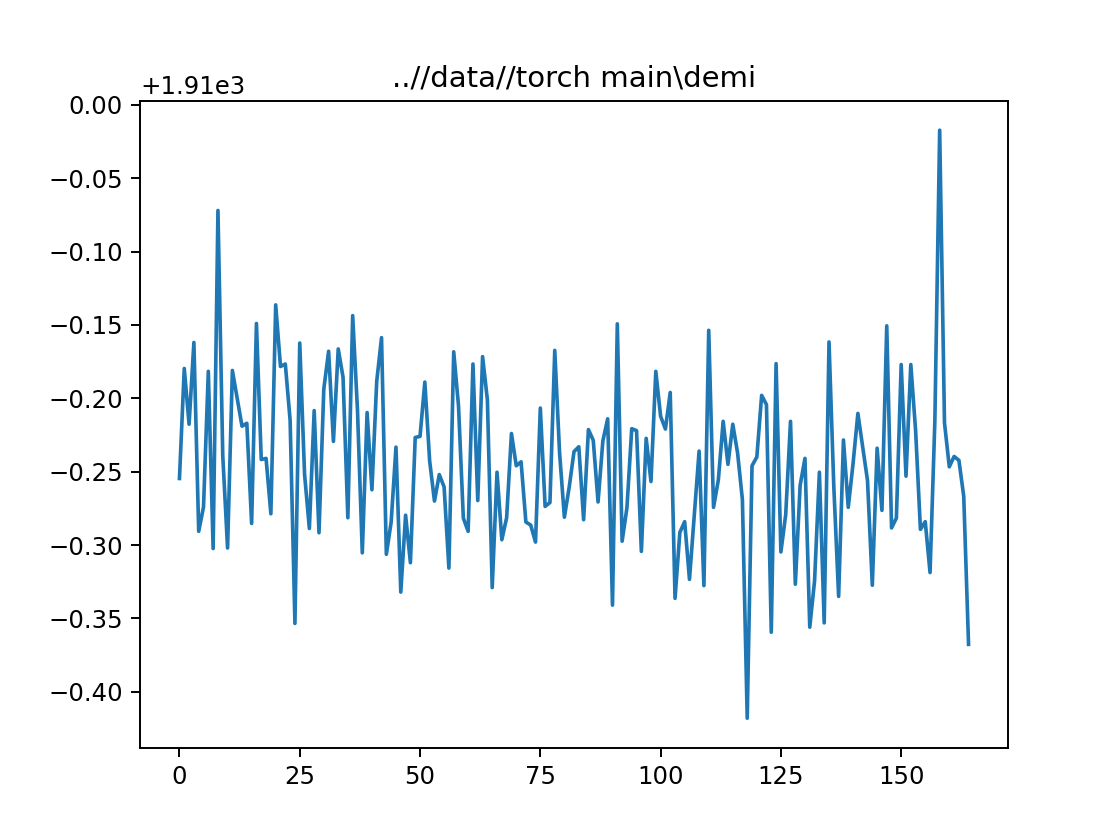

Data shape:  torch.Size([165, 1, 35000])


<IPython.core.display.Javascript object>


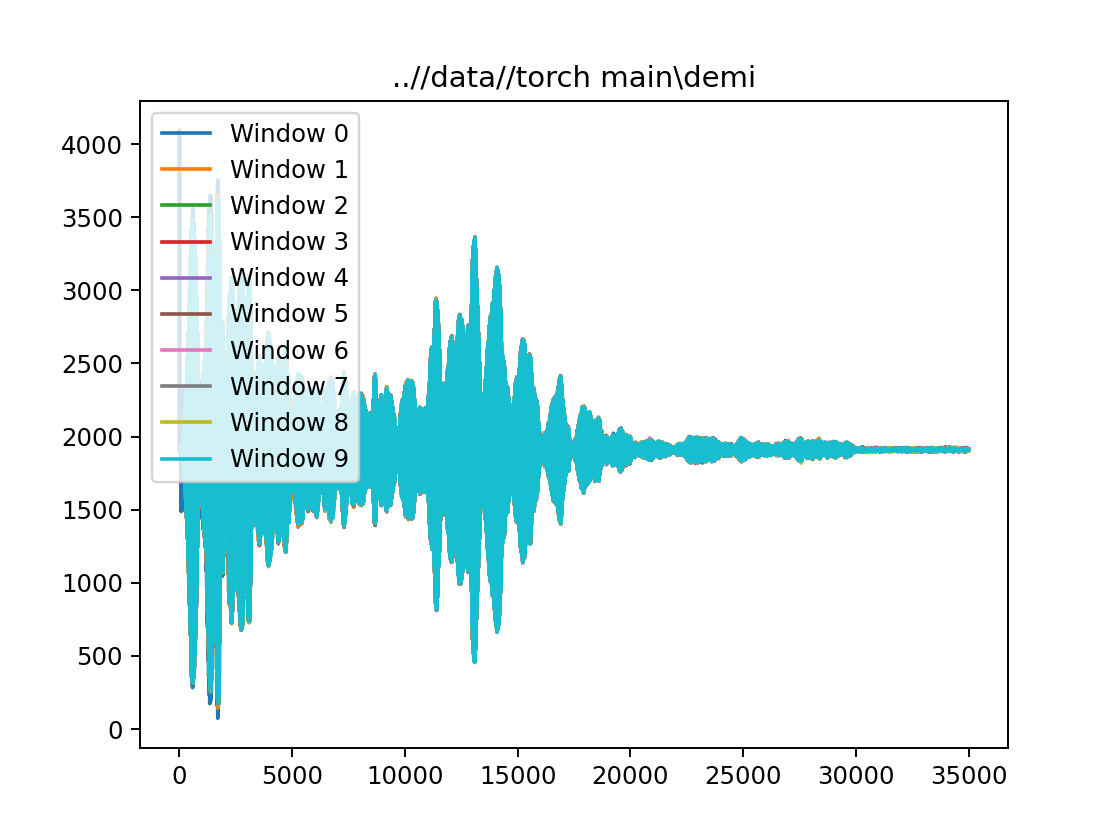

Data shape:  torch.Size([149, 1, 35000])


<IPython.core.display.Javascript object>


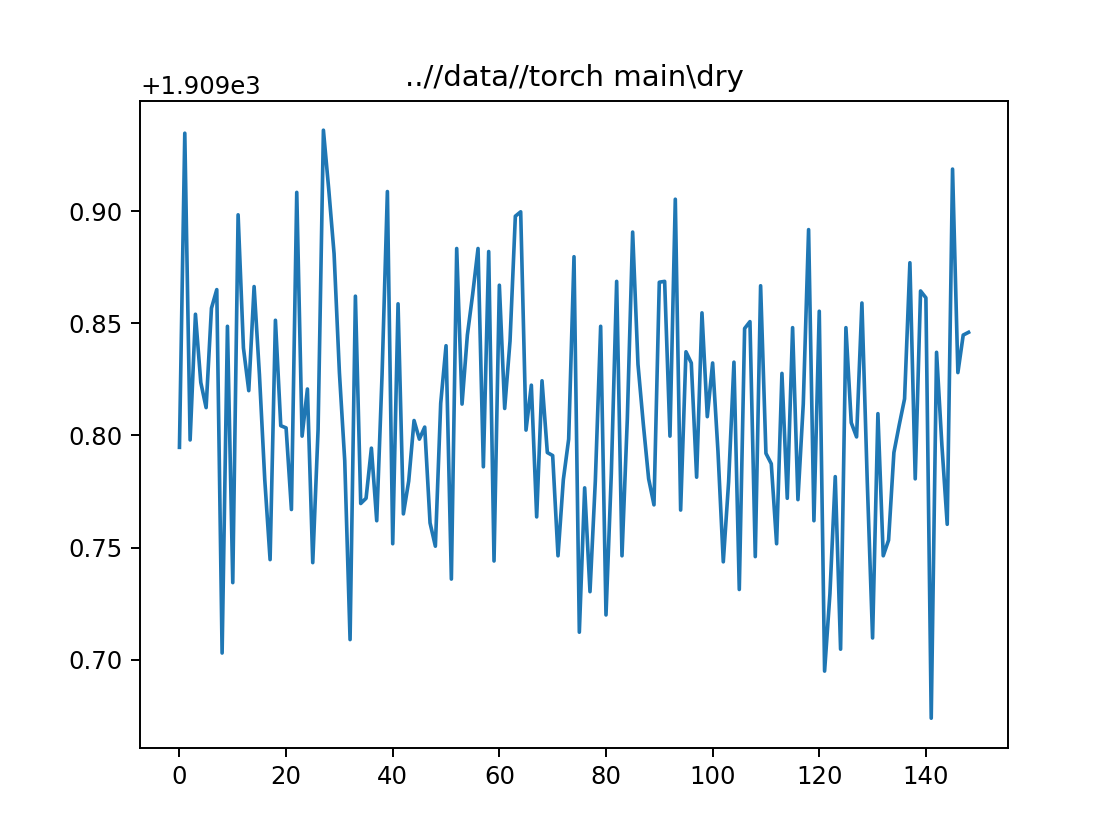

Data shape:  torch.Size([149, 1, 35000])


<IPython.core.display.Javascript object>


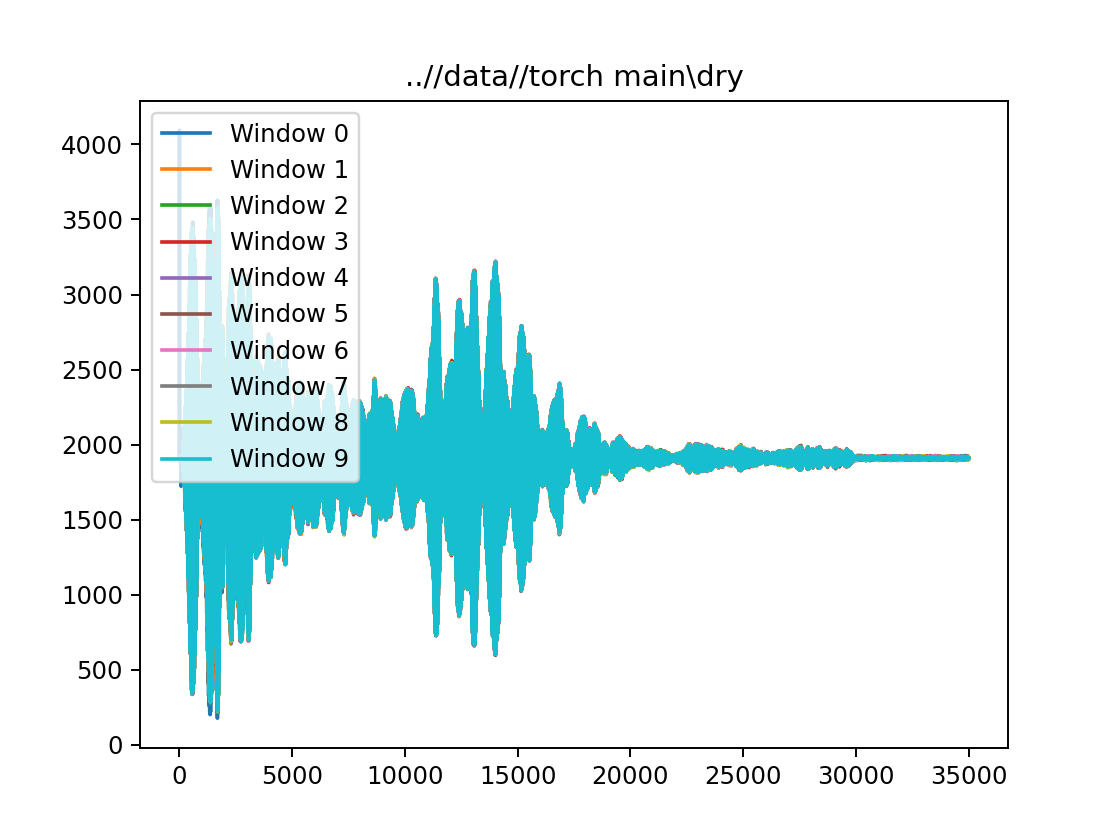

Data shape:  torch.Size([1079, 1, 35000])


<IPython.core.display.Javascript object>


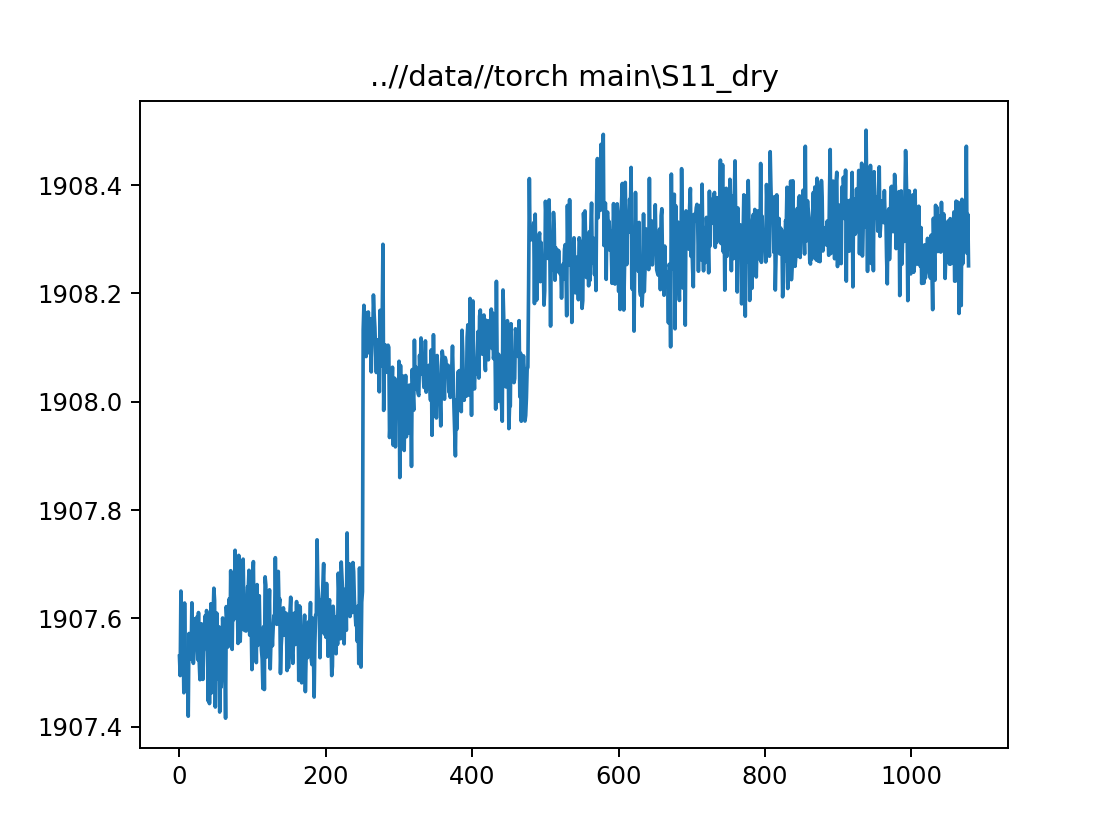

Data shape:  torch.Size([1079, 1, 35000])


<IPython.core.display.Javascript object>


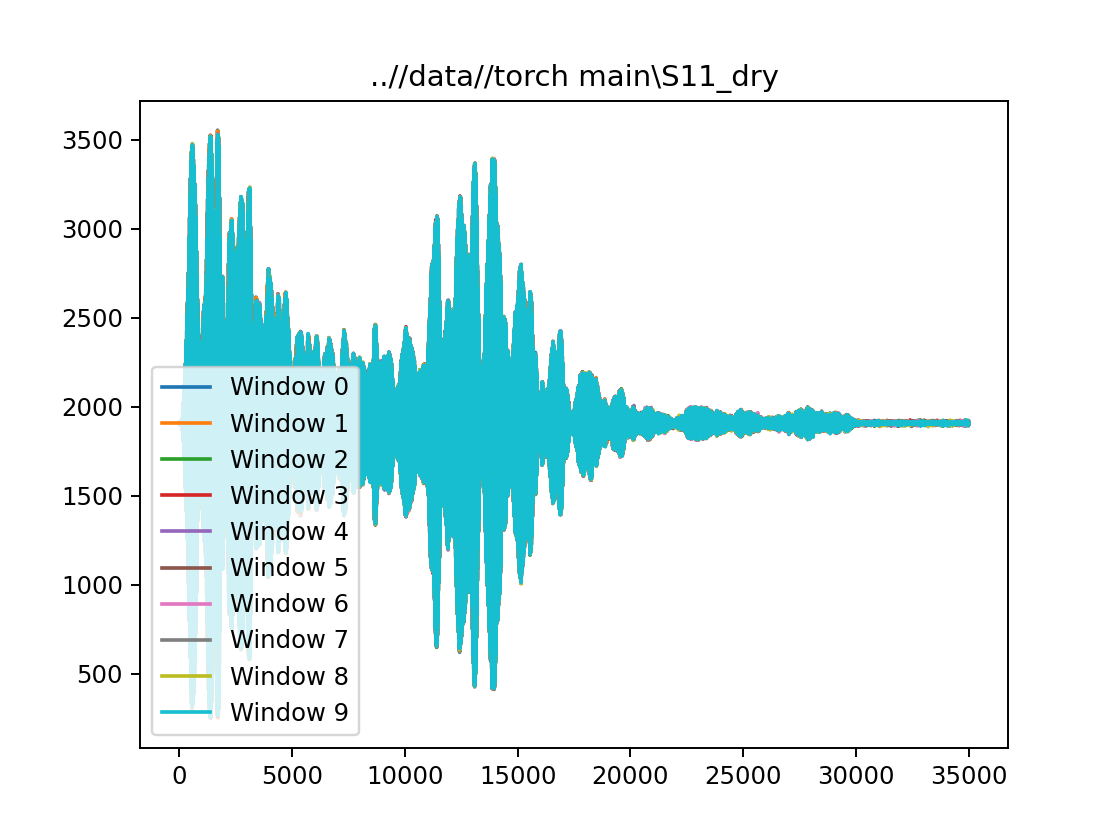

Data shape:  torch.Size([1495, 1, 35000])


<IPython.core.display.Javascript object>


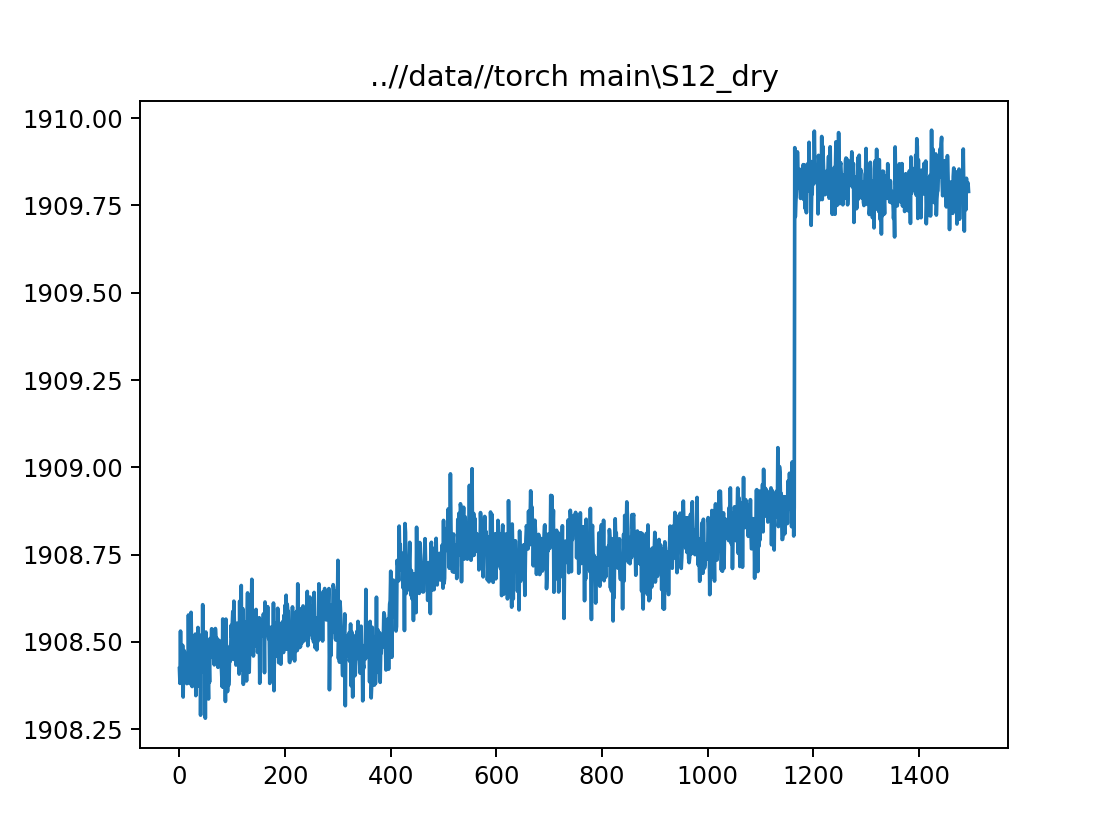

Data shape:  torch.Size([1495, 1, 35000])


<IPython.core.display.Javascript object>


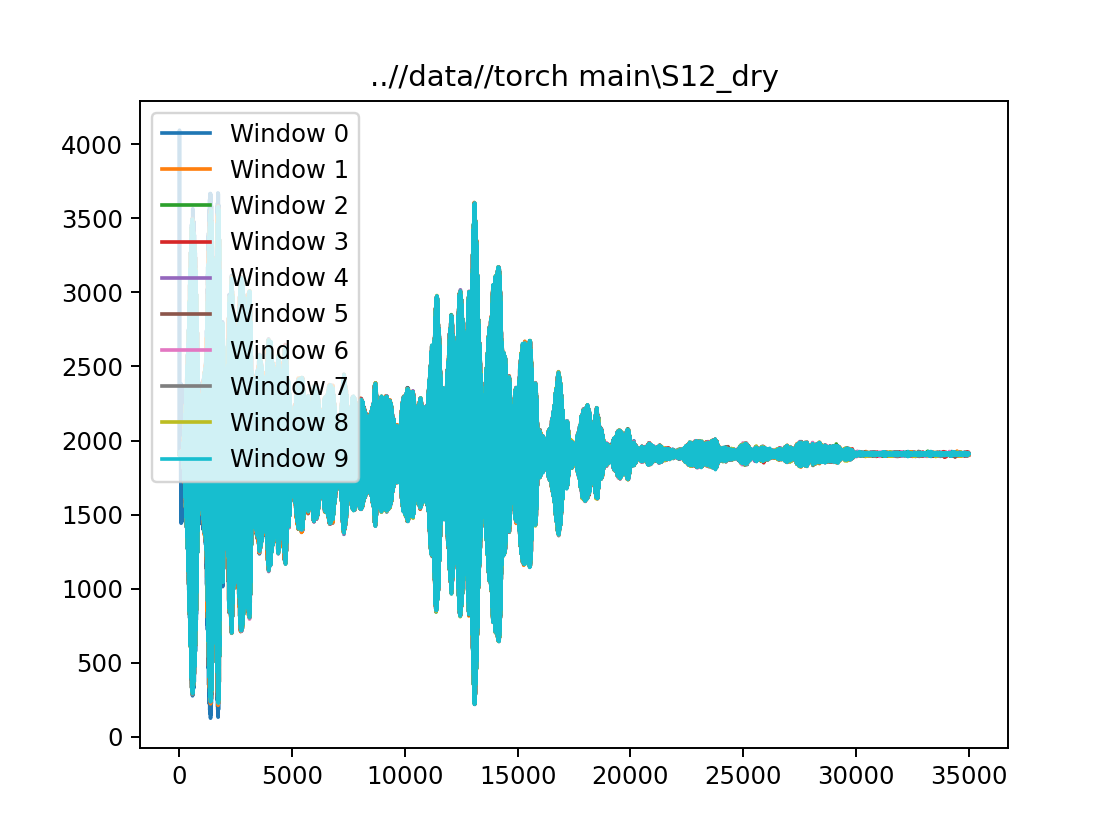

Data shape:  torch.Size([1218, 1, 35000])


<IPython.core.display.Javascript object>


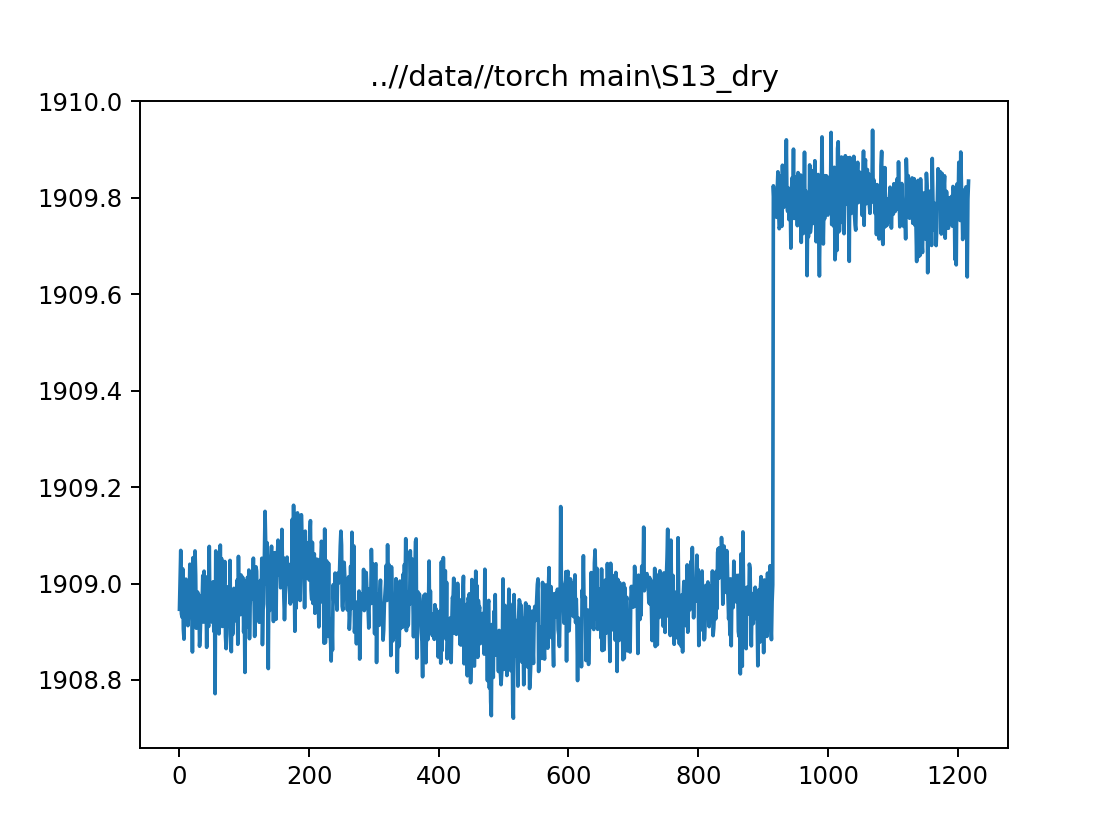

Data shape:  torch.Size([1218, 1, 35000])


<IPython.core.display.Javascript object>


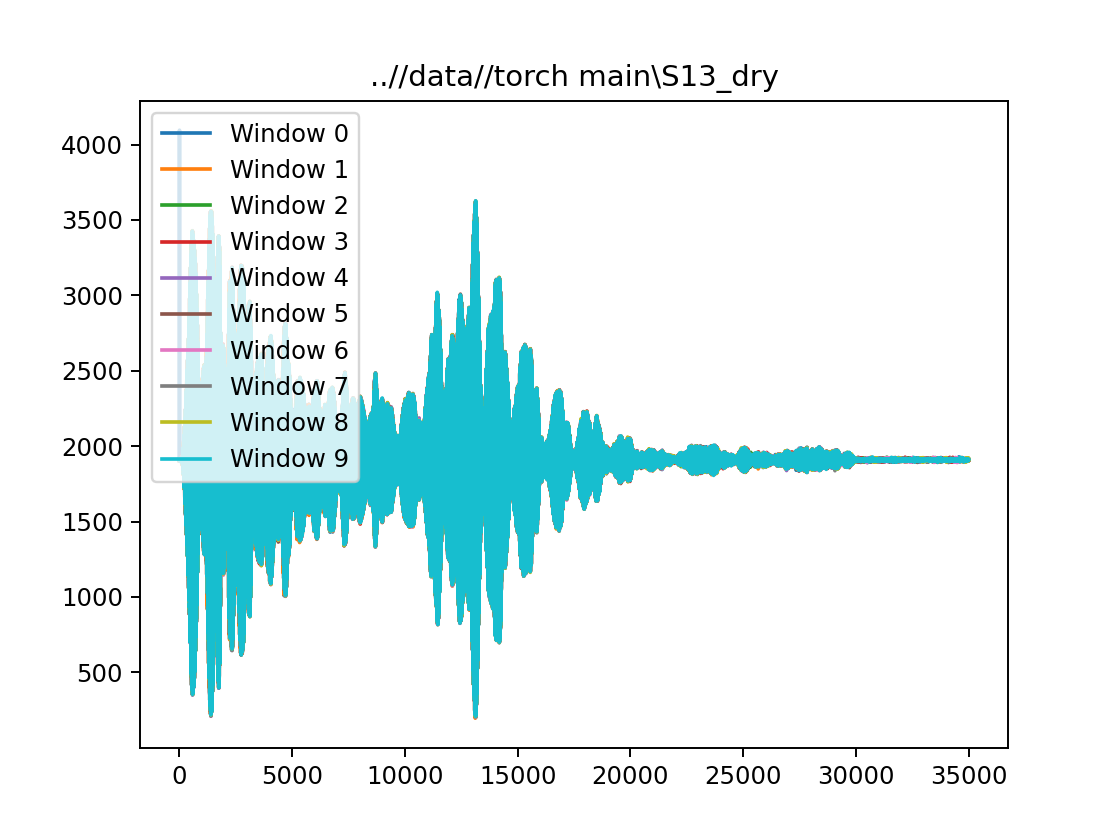

Data shape:  torch.Size([1312, 1, 35000])


<IPython.core.display.Javascript object>


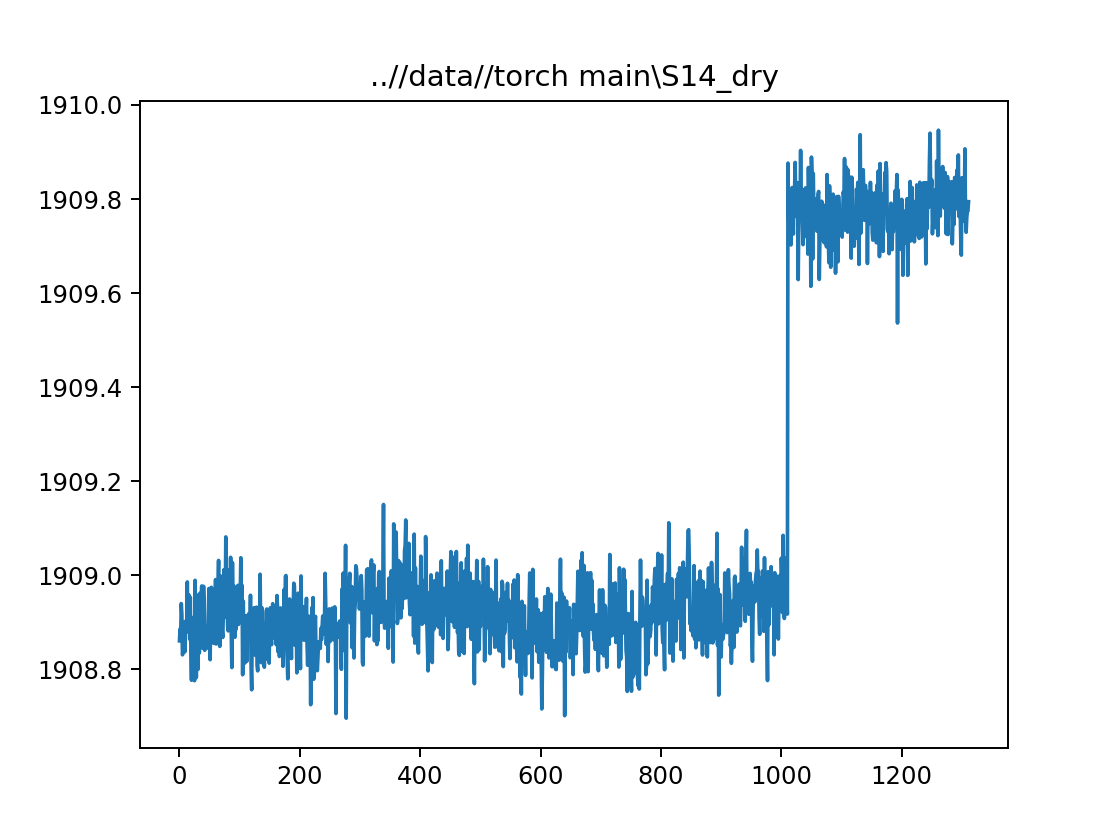

Data shape:  torch.Size([1312, 1, 35000])


<IPython.core.display.Javascript object>


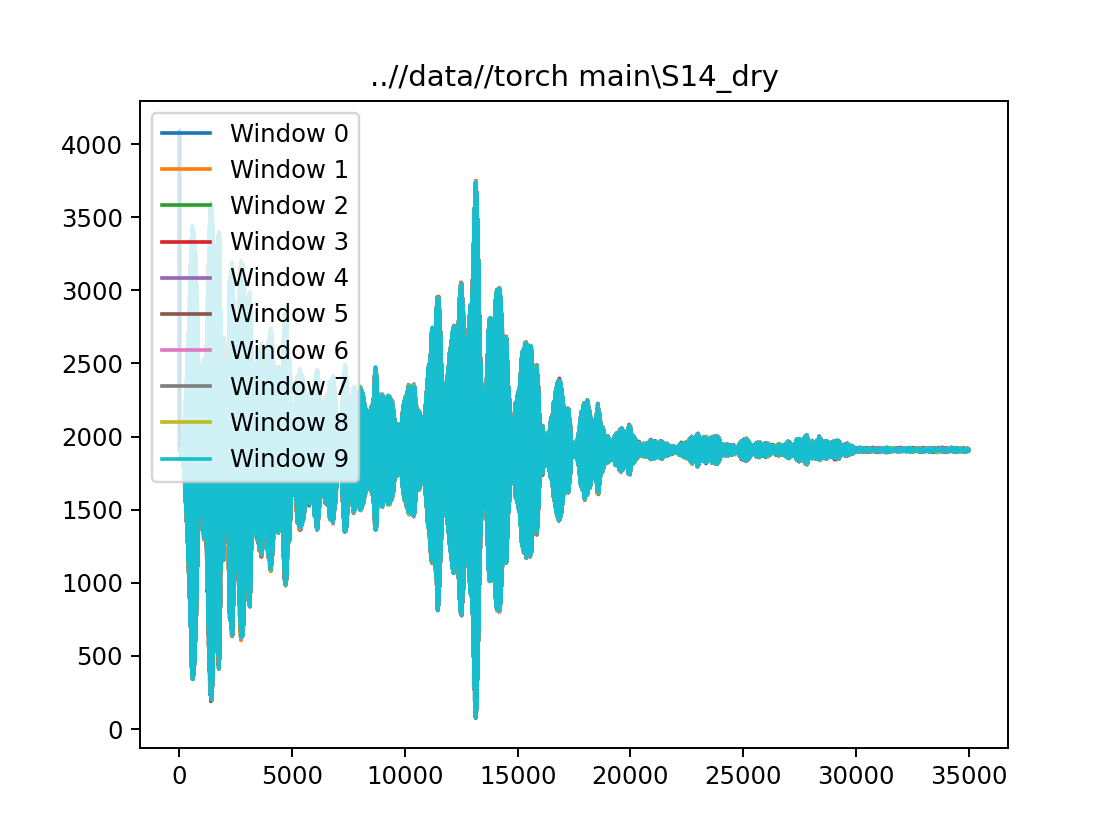

Data shape:  torch.Size([1226, 1, 35000])


<IPython.core.display.Javascript object>


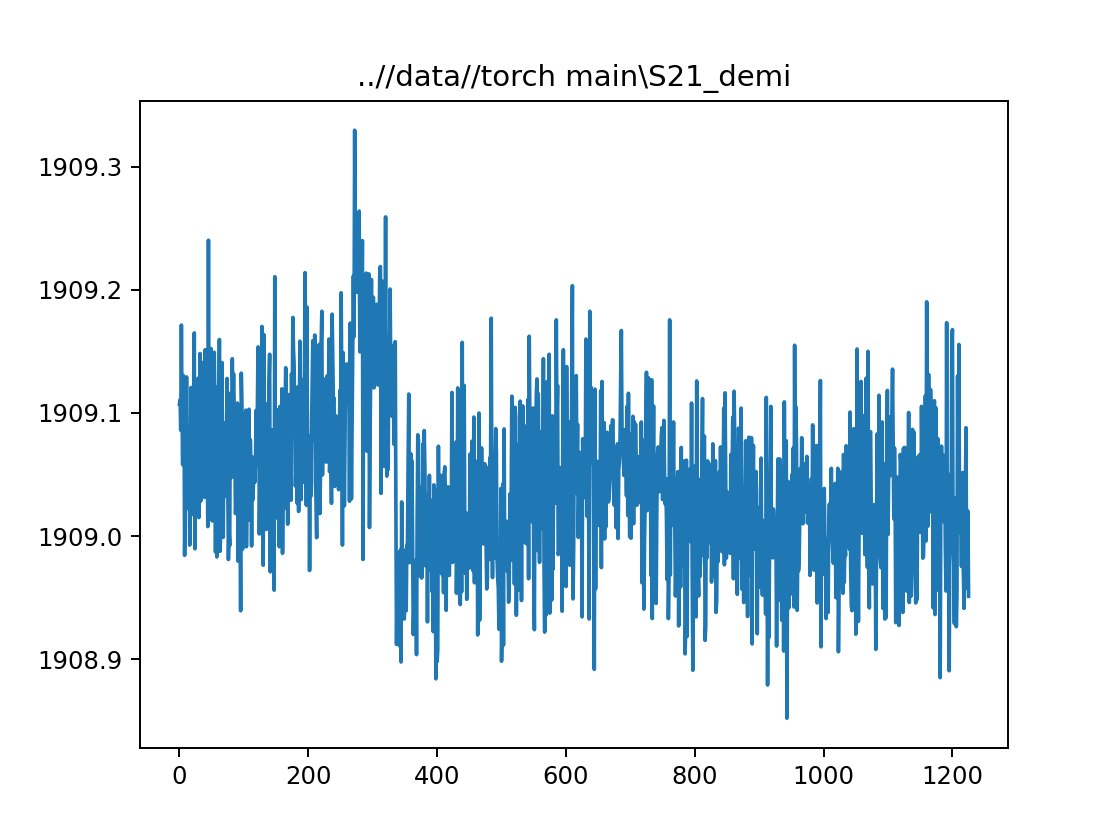

Data shape:  torch.Size([1226, 1, 35000])


<IPython.core.display.Javascript object>


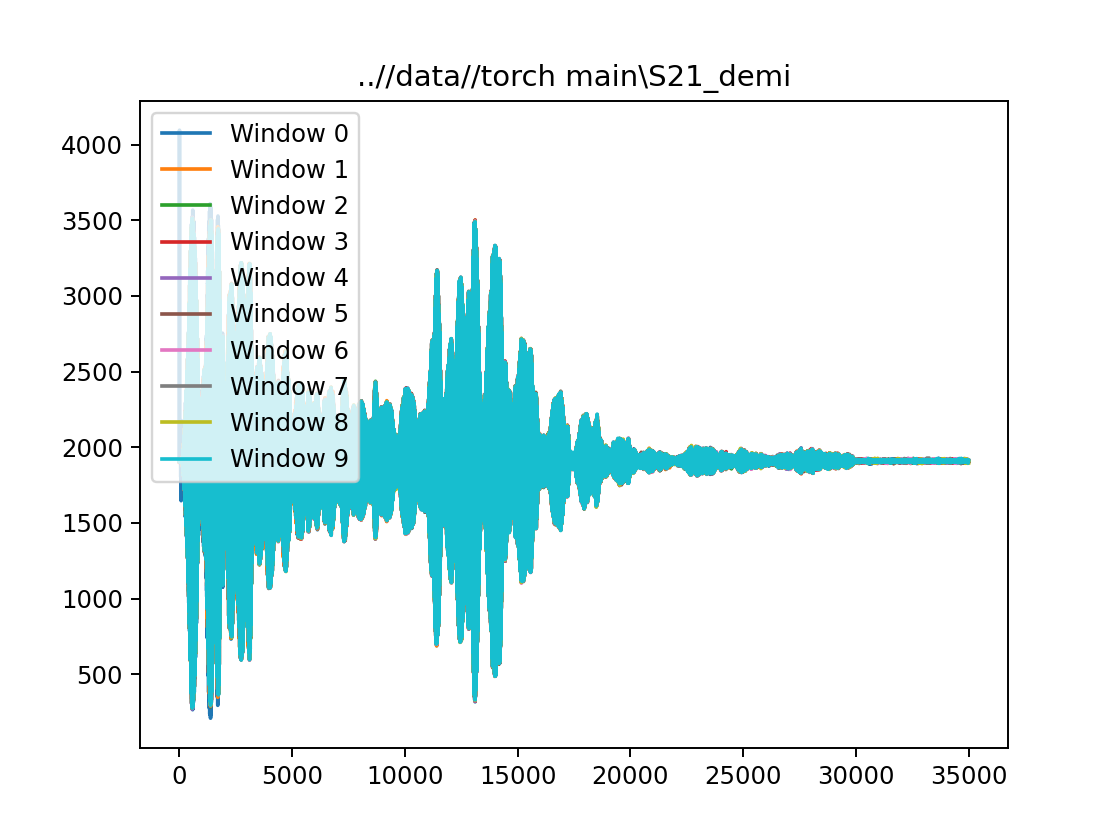

Data shape:  torch.Size([1082, 1, 35000])


<IPython.core.display.Javascript object>


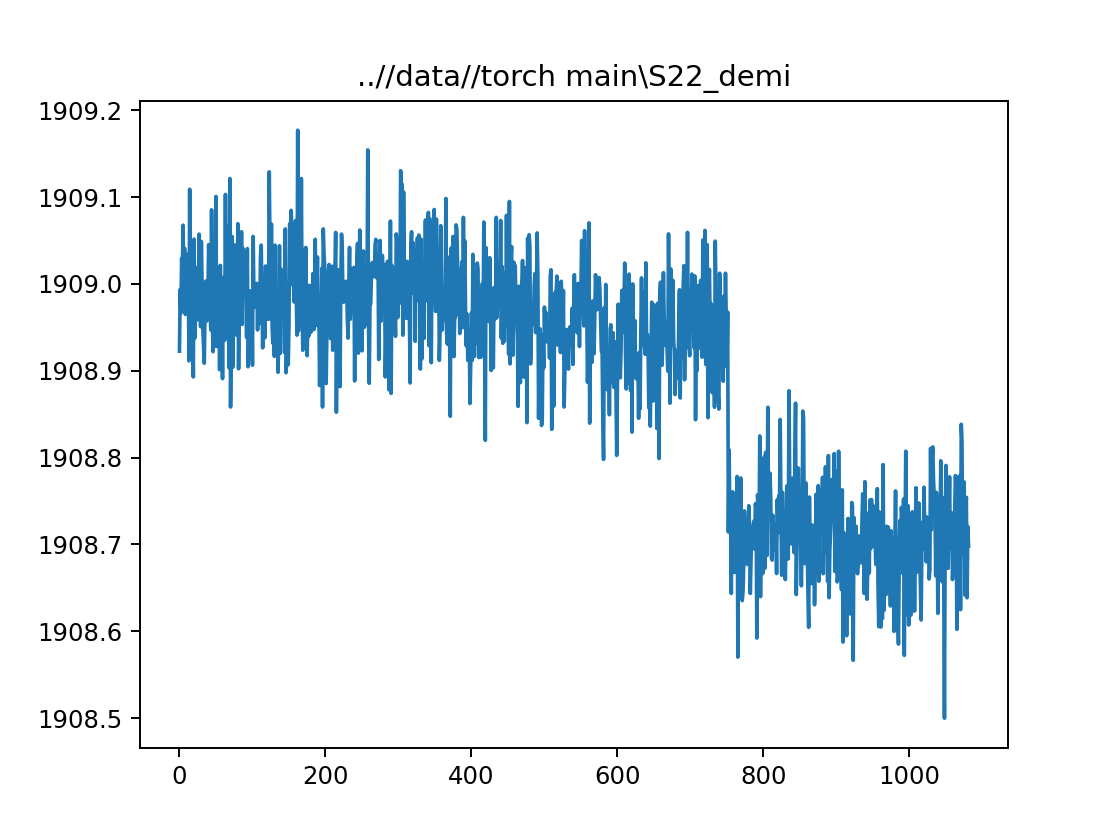

Data shape:  torch.Size([1082, 1, 35000])


<IPython.core.display.Javascript object>


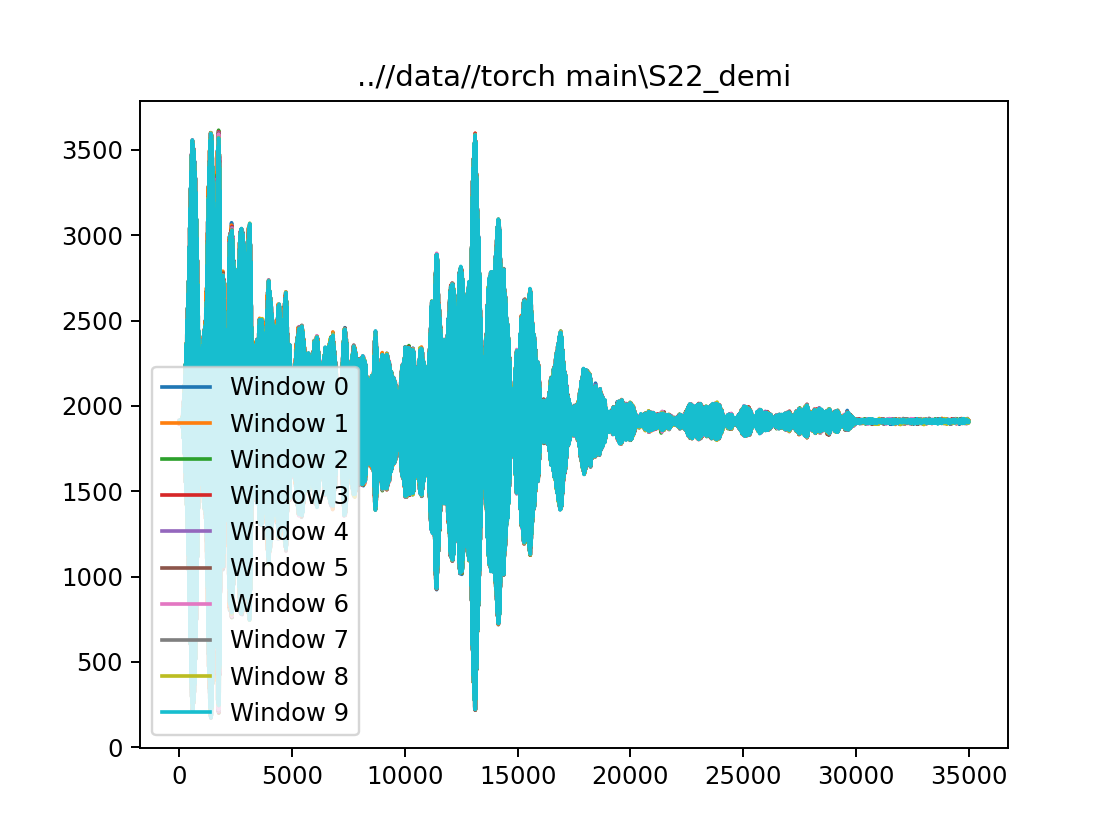

Data shape:  torch.Size([849, 1, 35000])


<IPython.core.display.Javascript object>


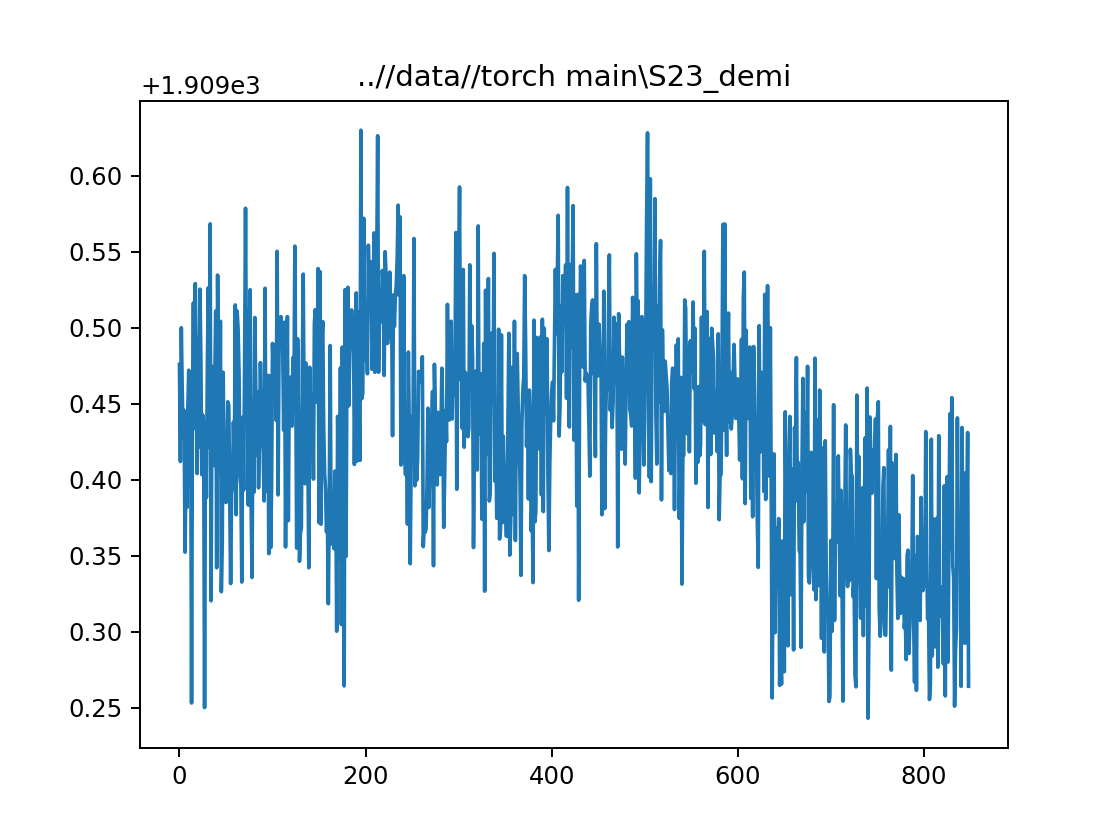

Data shape:  torch.Size([849, 1, 35000])


<IPython.core.display.Javascript object>


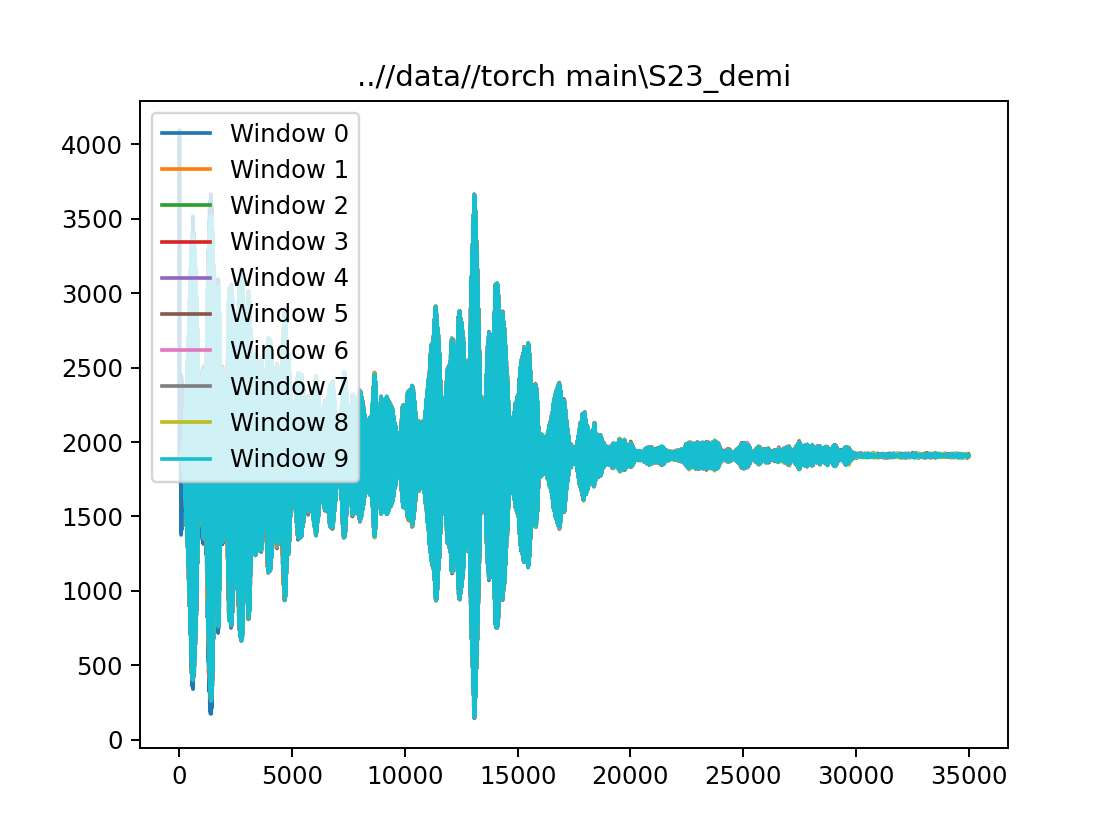

Data shape:  torch.Size([1639, 1, 35000])


<IPython.core.display.Javascript object>


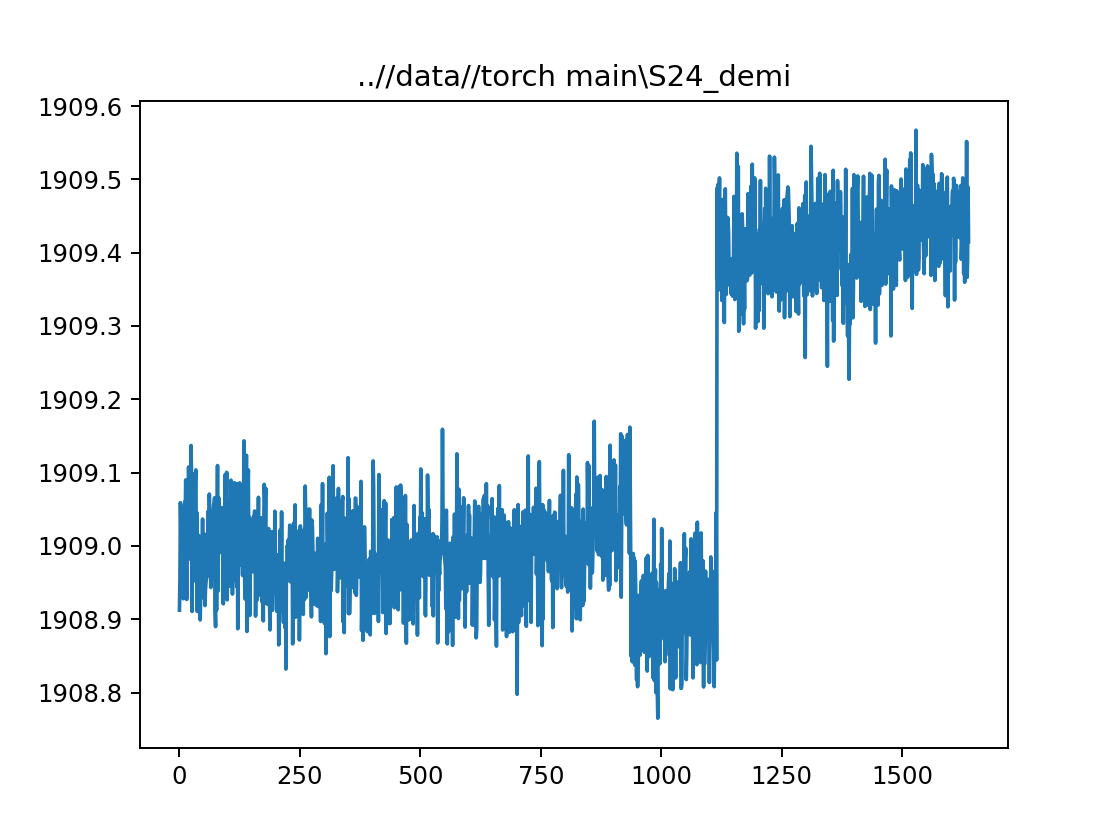

Data shape:  torch.Size([1639, 1, 35000])


<IPython.core.display.Javascript object>


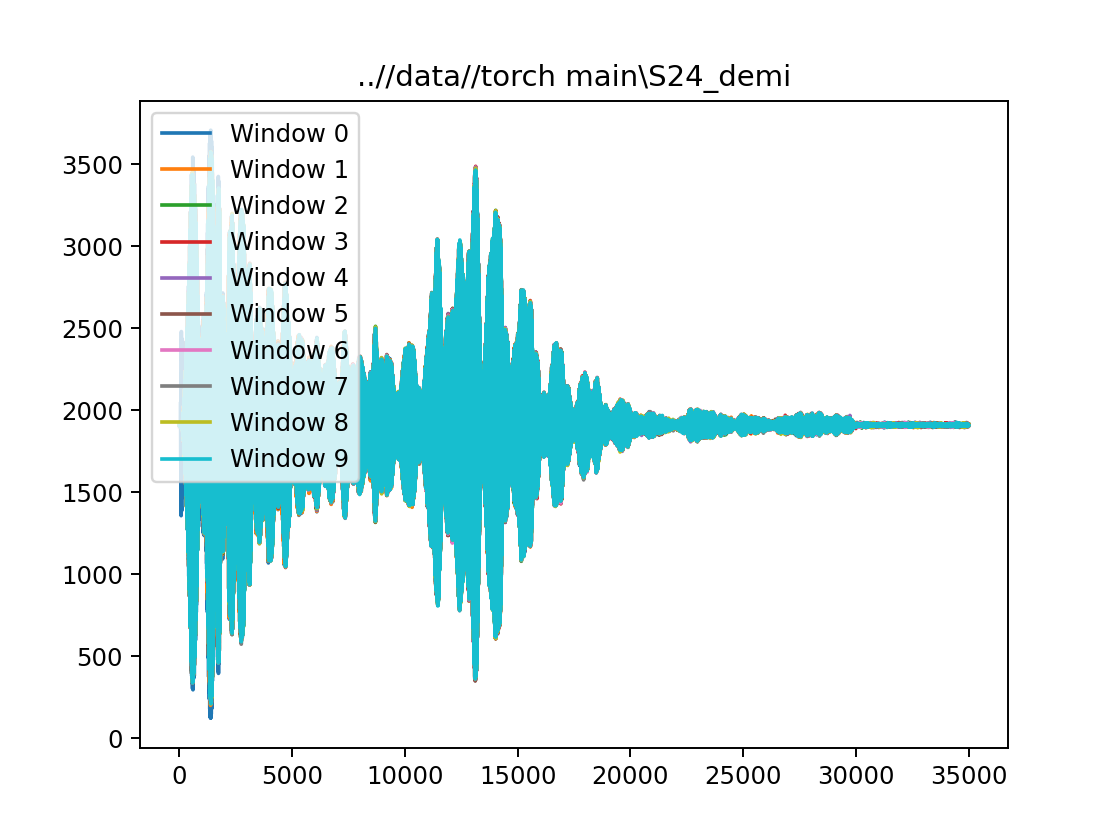

Data shape:  torch.Size([834, 1, 35000])


C:\Users\masg\AppData\Local\Temp\ipykernel_11384\3832380303.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<IPython.core.display.Javascript object>


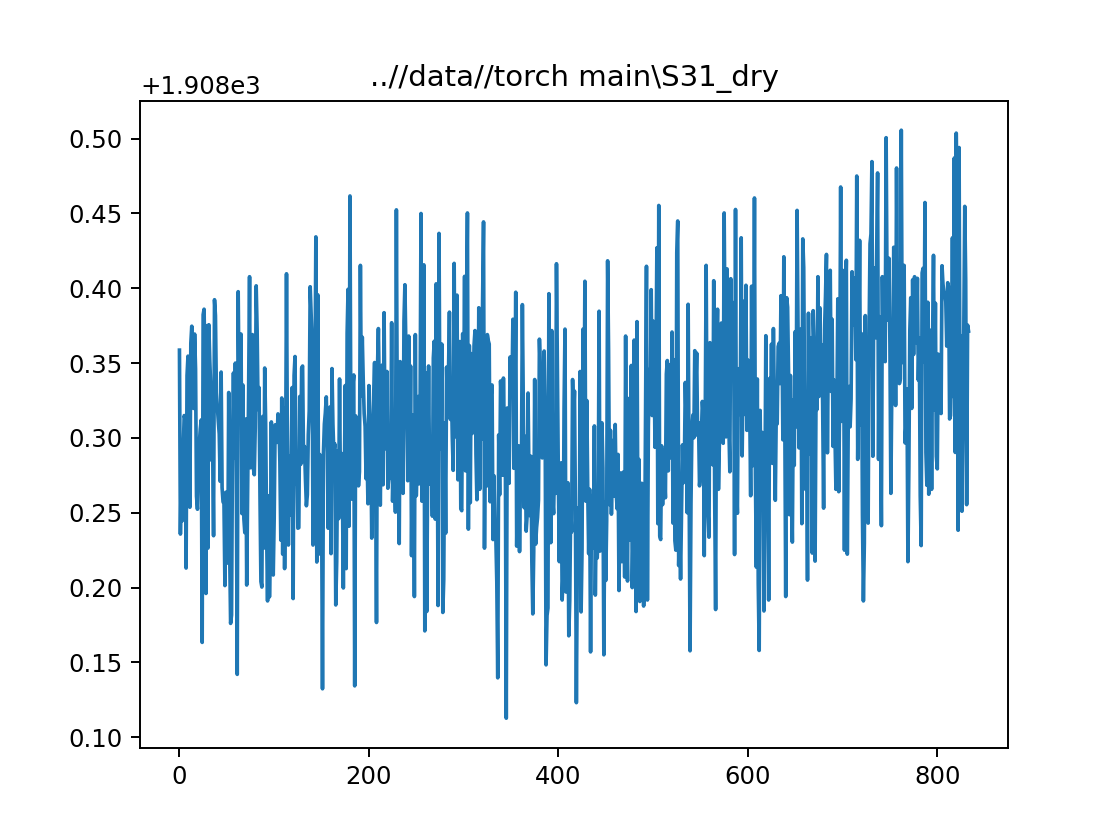

Data shape:  torch.Size([834, 1, 35000])


<IPython.core.display.Javascript object>


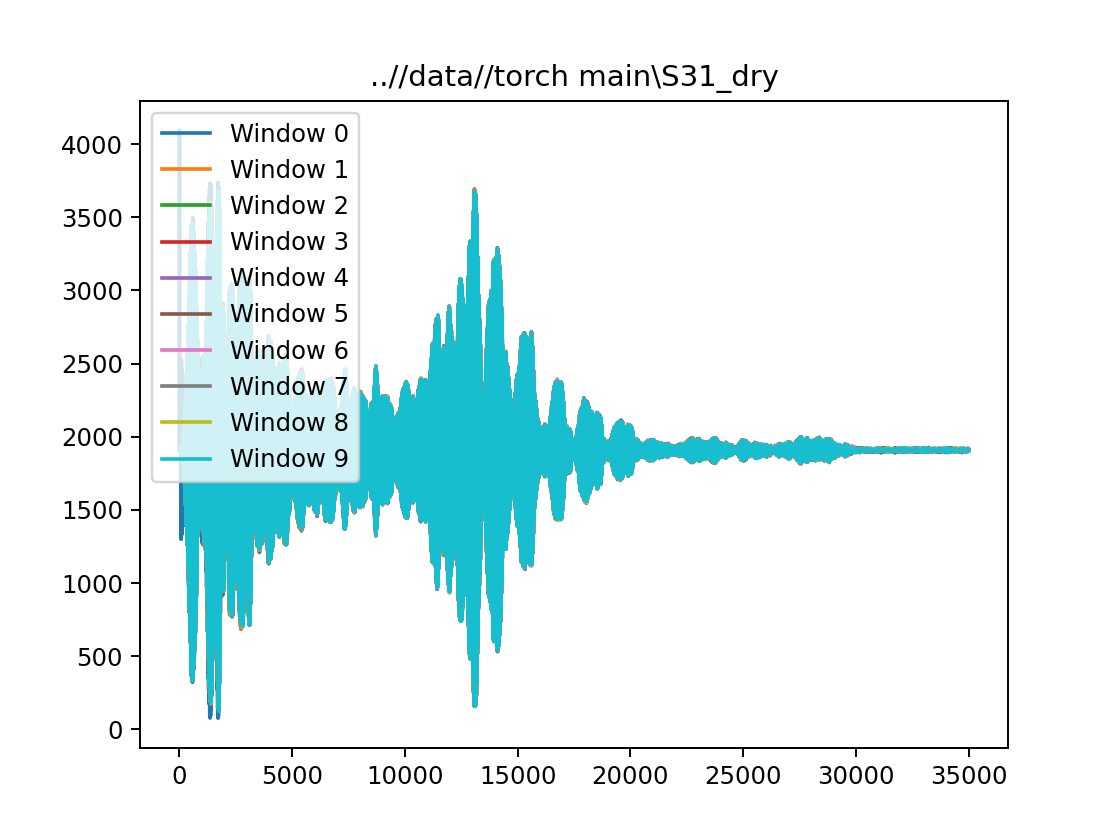

Data shape:  torch.Size([1463, 1, 35000])


<IPython.core.display.Javascript object>


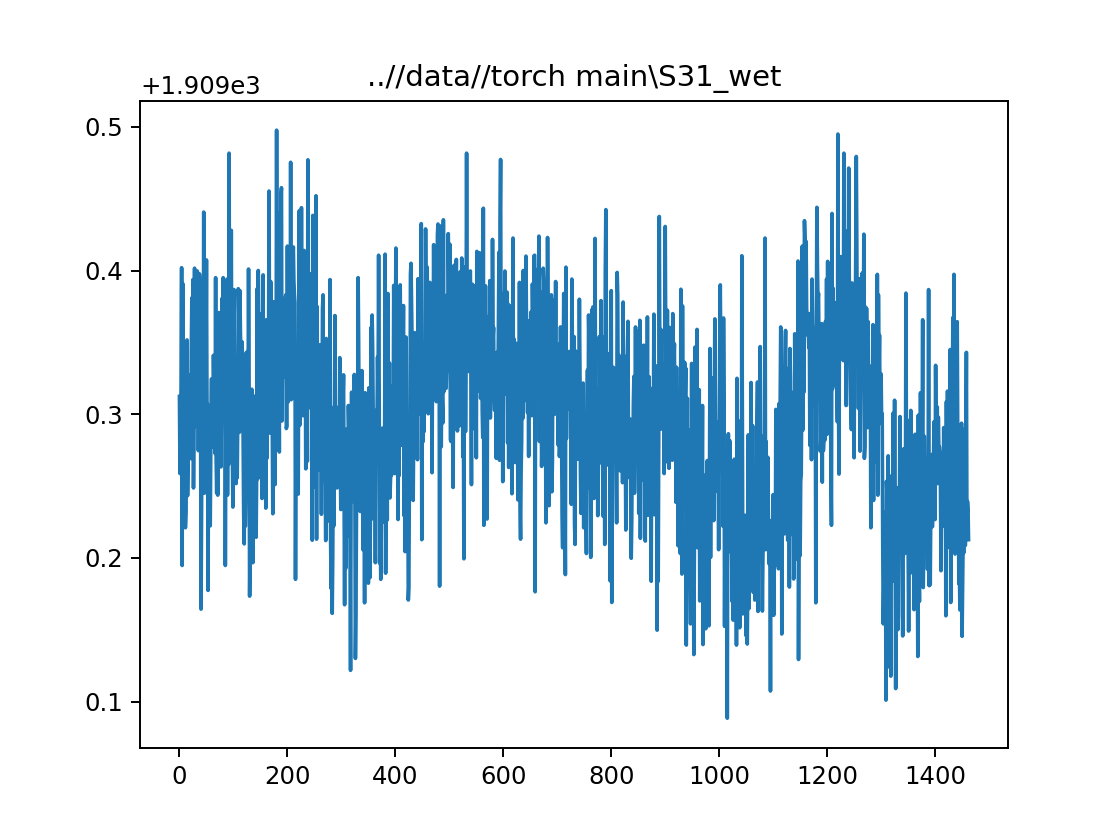

Data shape:  torch.Size([1463, 1, 35000])


<IPython.core.display.Javascript object>


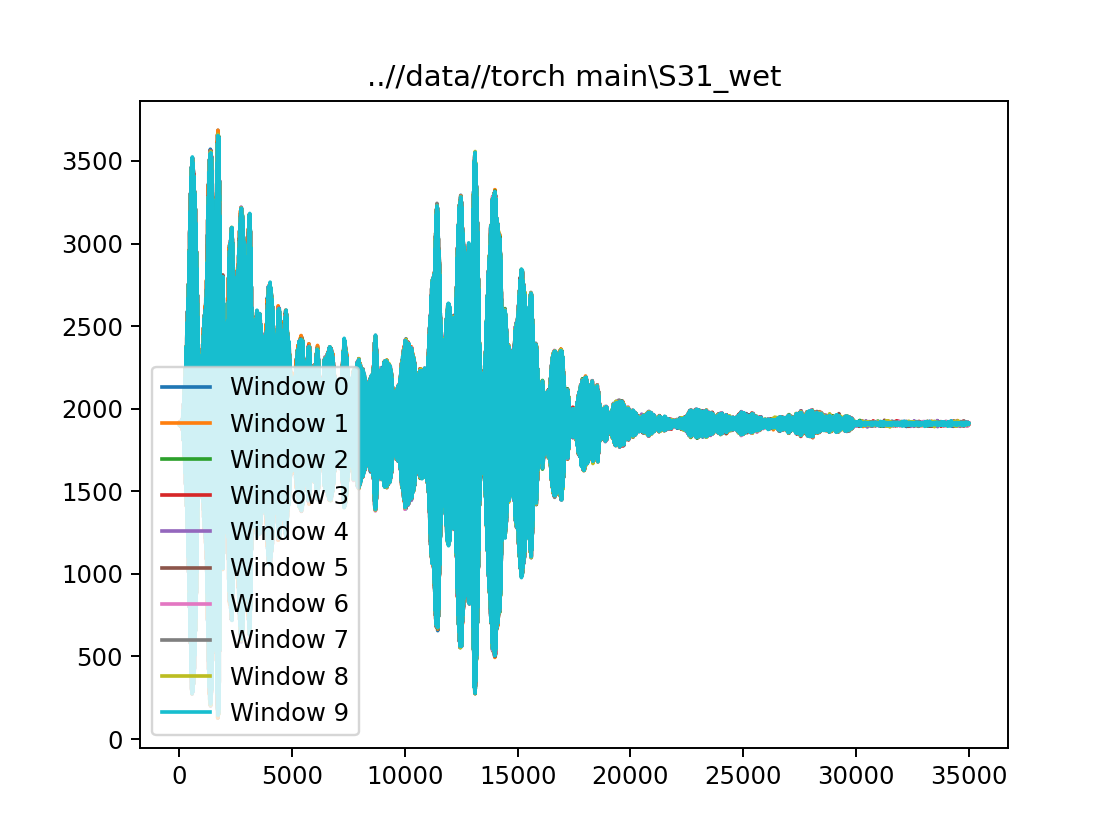

Data shape:  torch.Size([1105, 1, 35000])


<IPython.core.display.Javascript object>


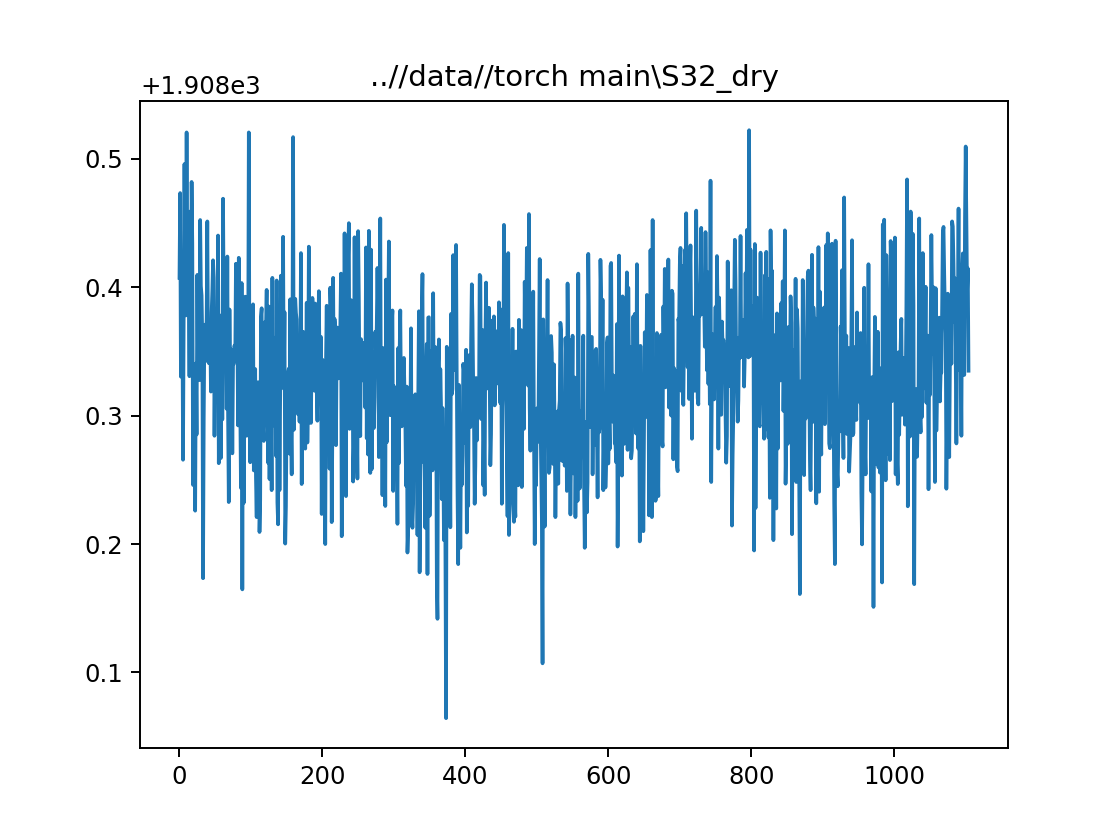

Data shape:  torch.Size([1105, 1, 35000])


<IPython.core.display.Javascript object>


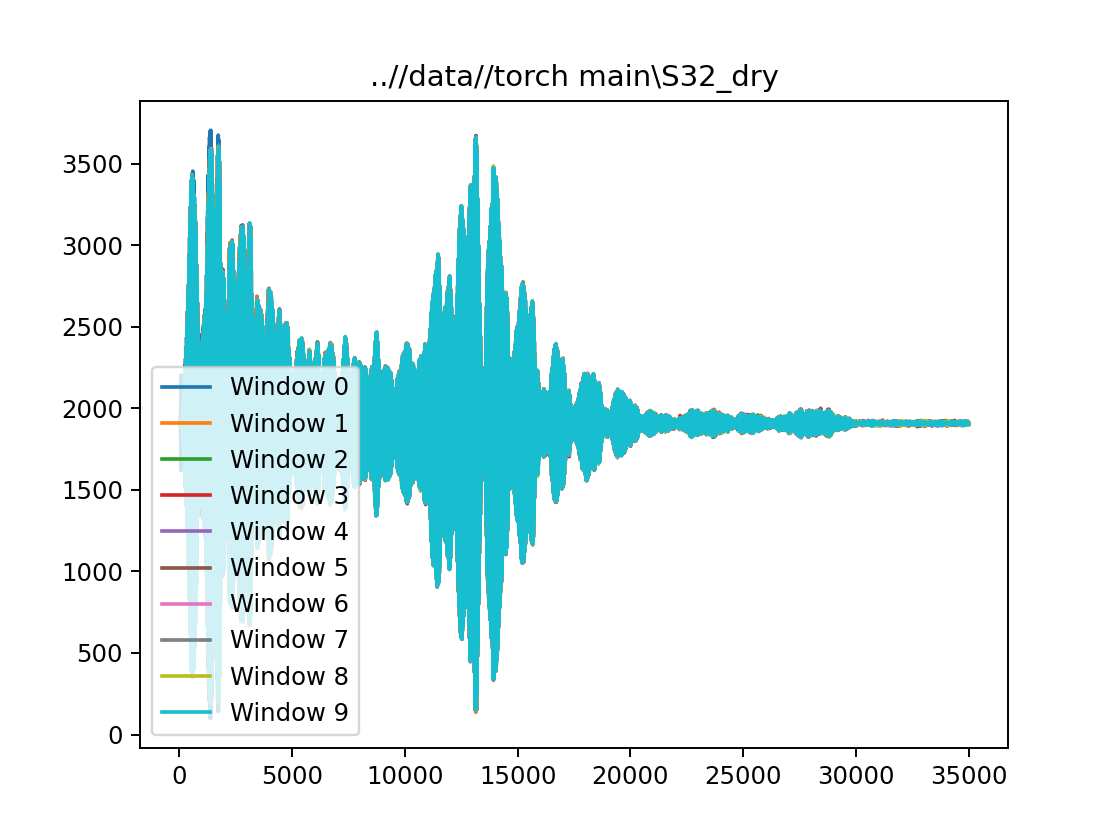

Data shape:  torch.Size([1482, 1, 35000])


<IPython.core.display.Javascript object>


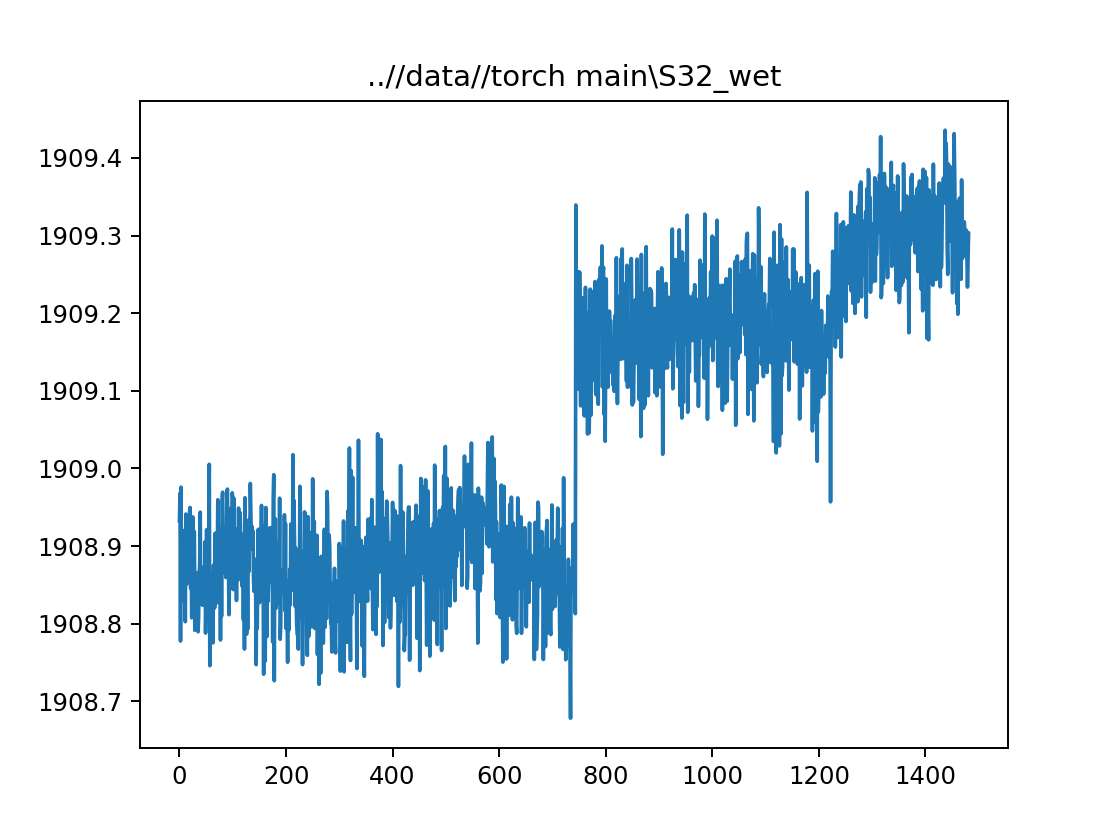

Data shape:  torch.Size([1482, 1, 35000])


<IPython.core.display.Javascript object>


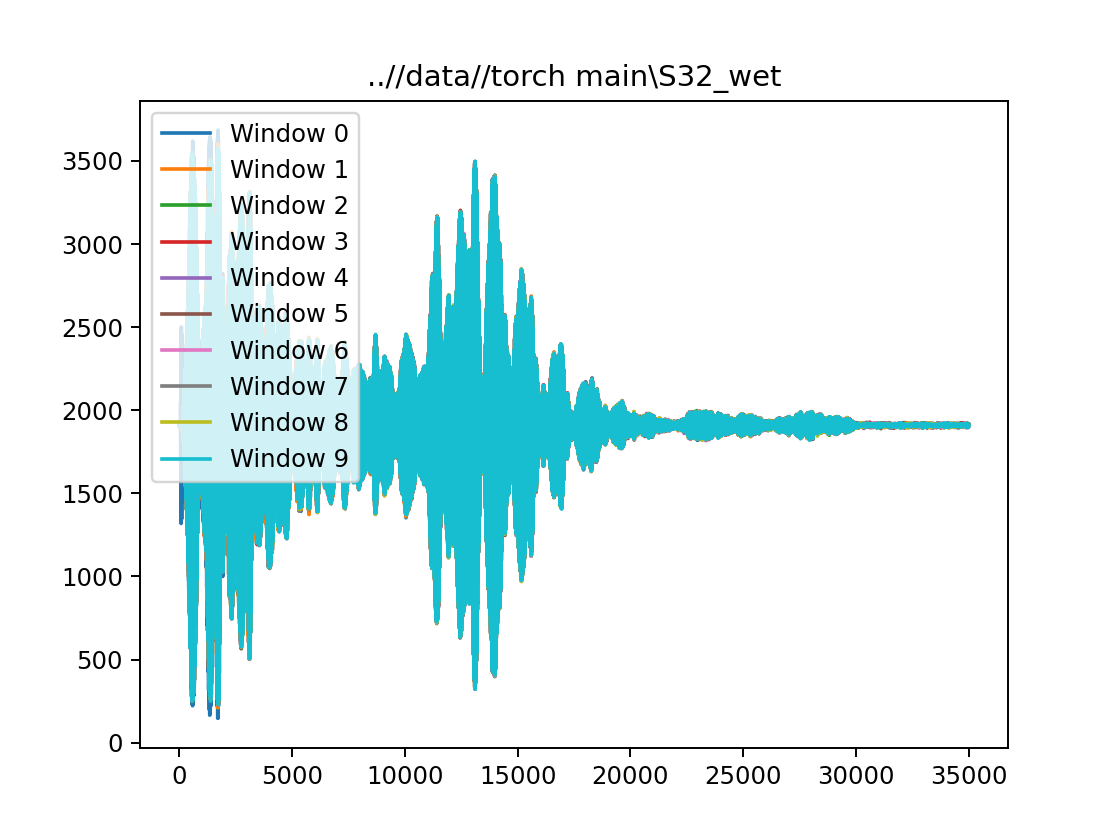

Data shape:  torch.Size([988, 1, 35000])


<IPython.core.display.Javascript object>


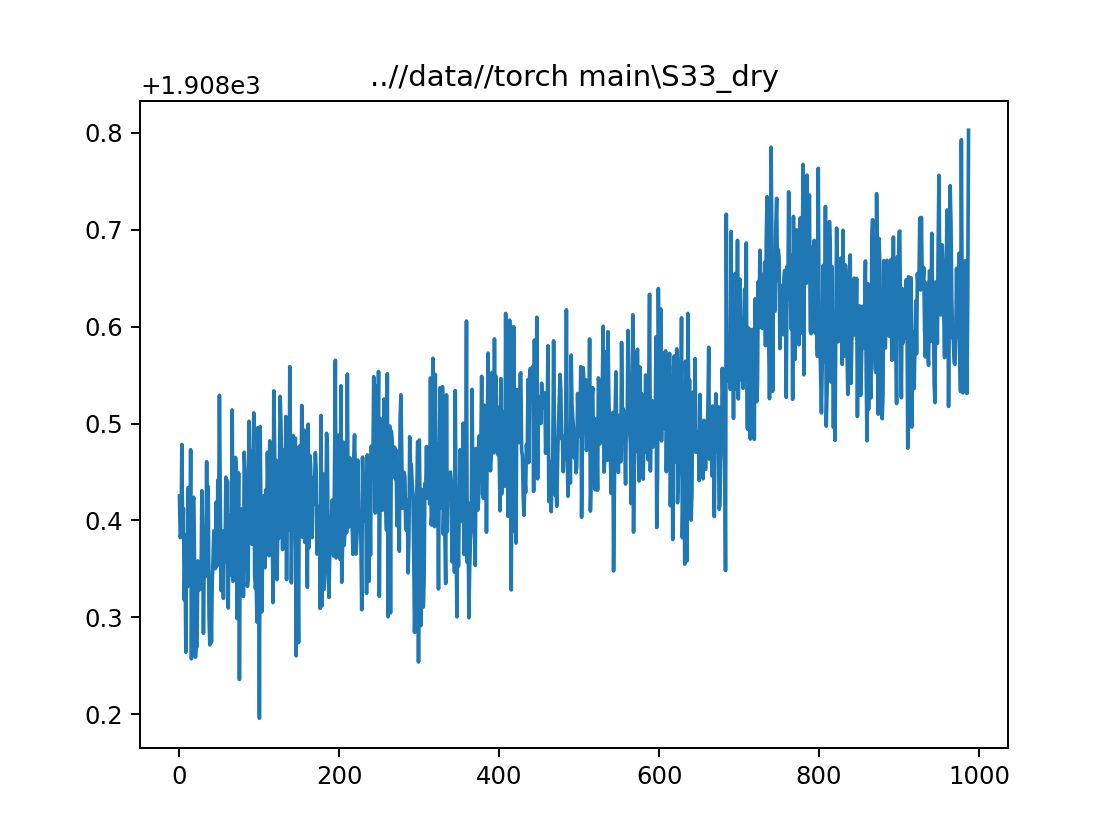

Data shape:  torch.Size([988, 1, 35000])


<IPython.core.display.Javascript object>


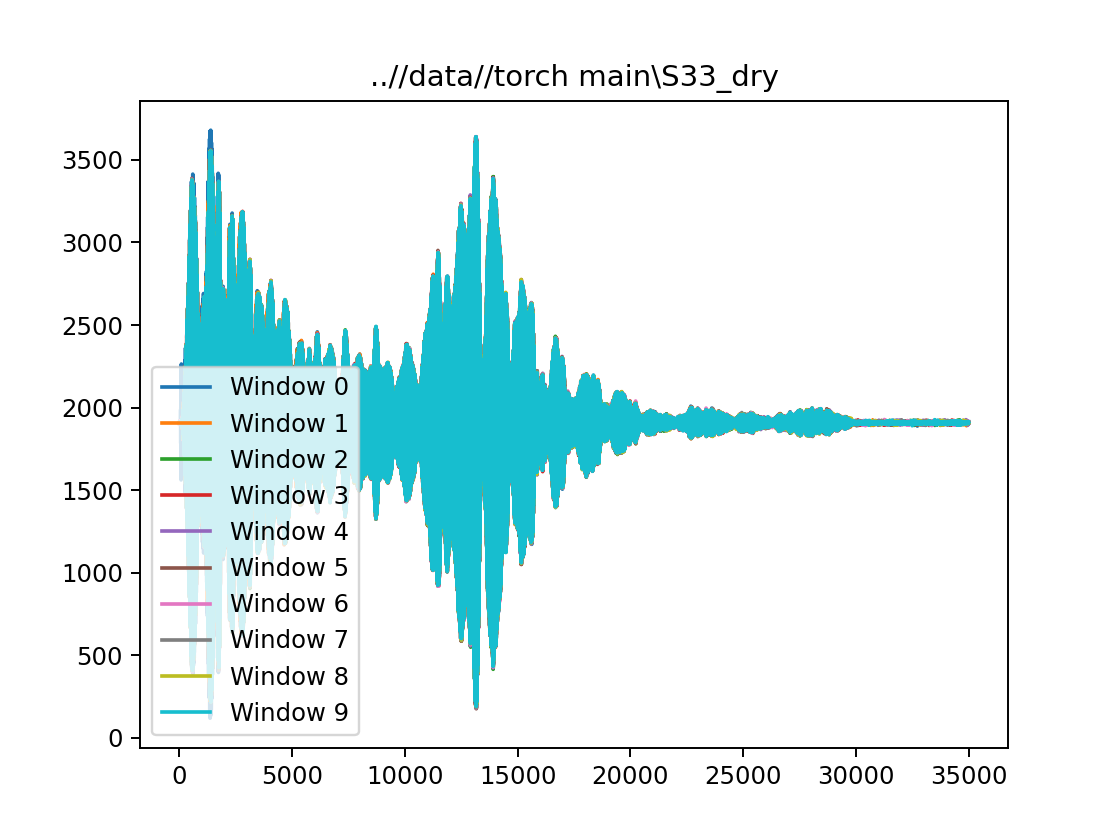

Data shape:  torch.Size([1491, 1, 35000])


<IPython.core.display.Javascript object>


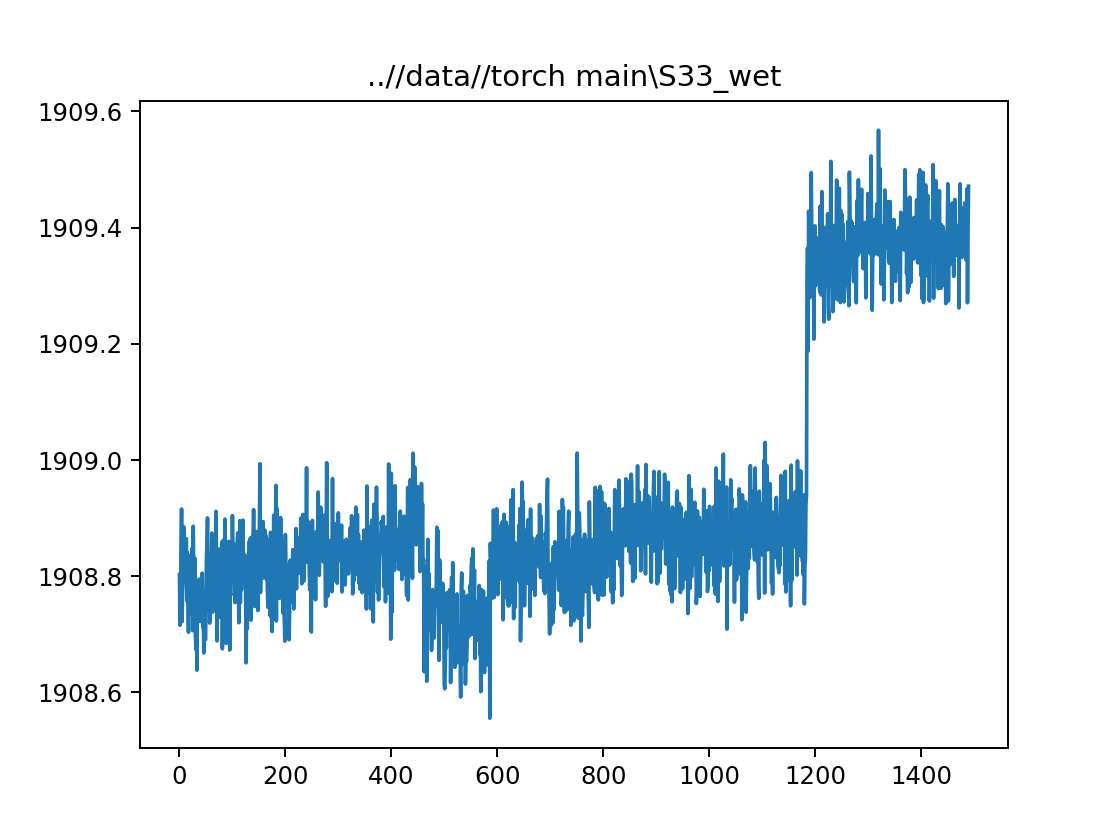

Data shape:  torch.Size([1491, 1, 35000])


<IPython.core.display.Javascript object>


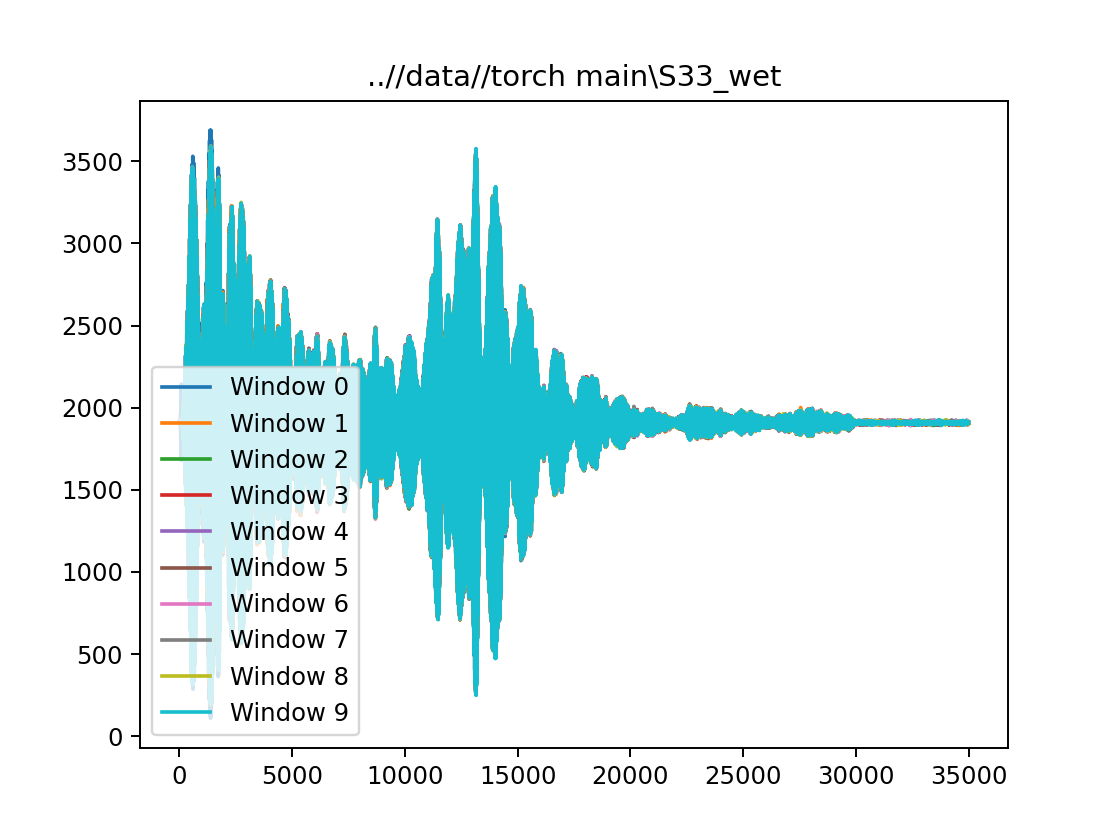

Data shape:  torch.Size([1075, 1, 35000])


<IPython.core.display.Javascript object>


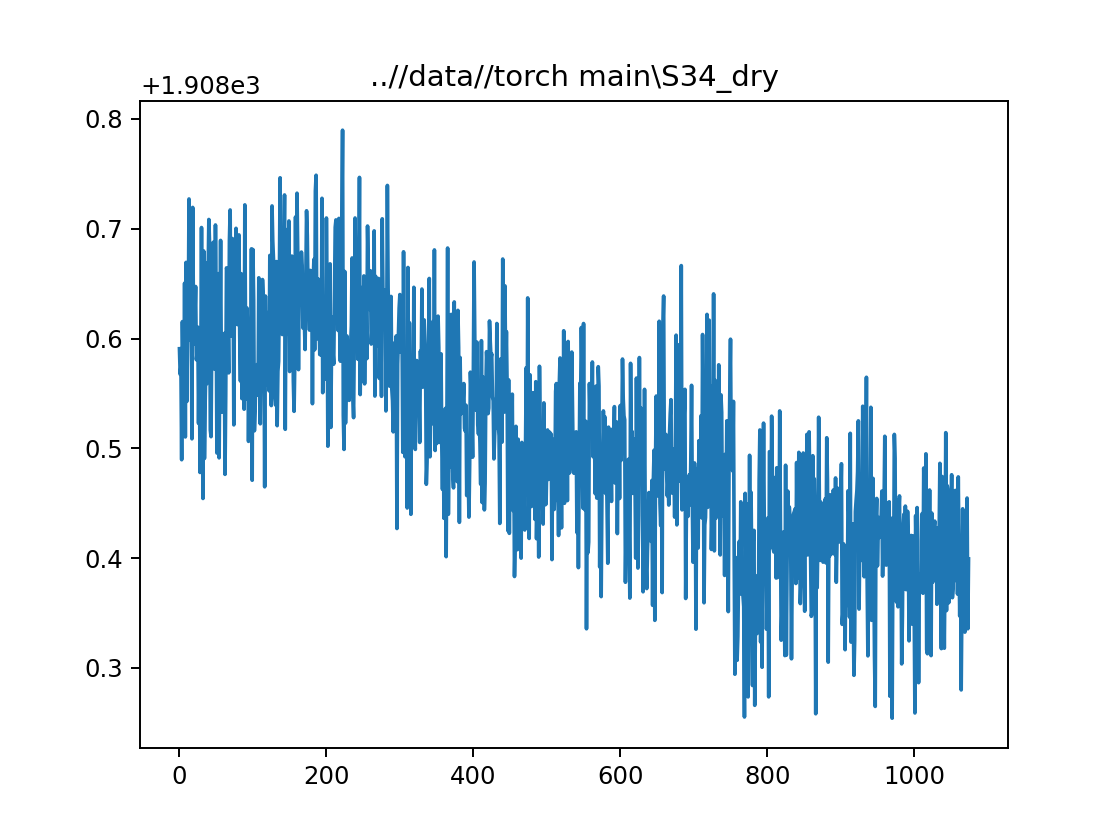

Data shape:  torch.Size([1075, 1, 35000])


<IPython.core.display.Javascript object>


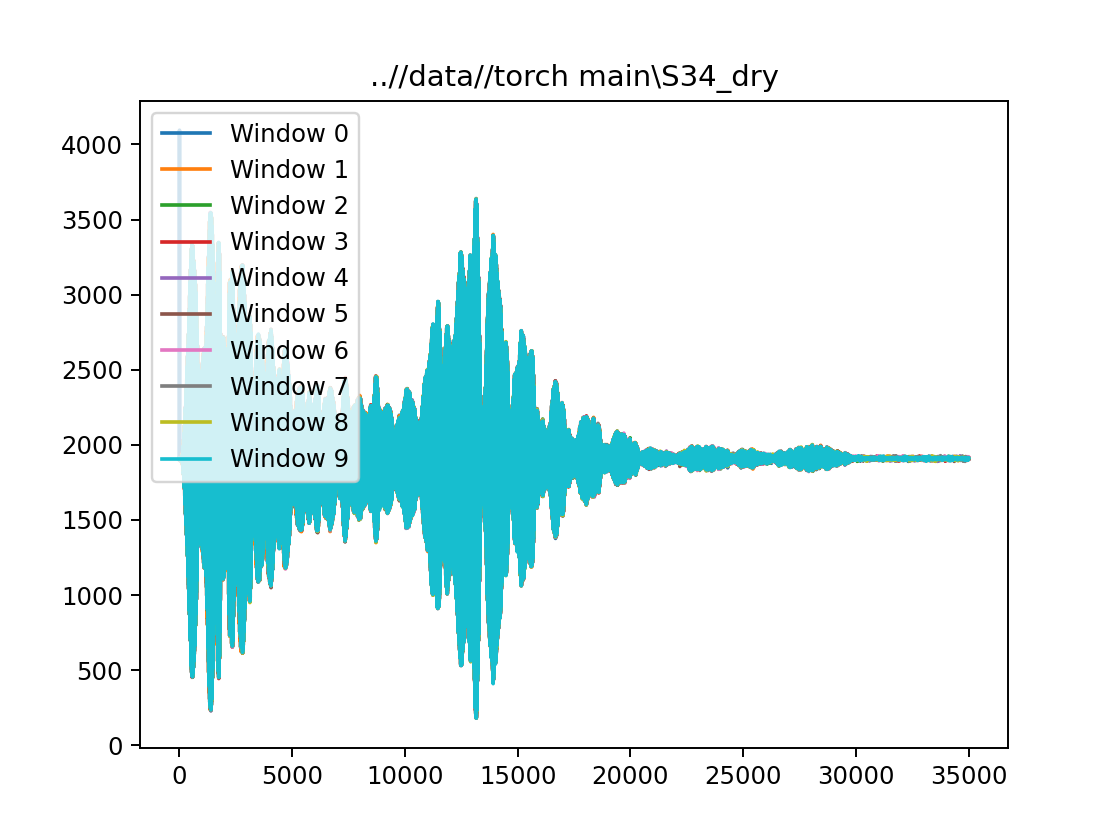

Data shape:  torch.Size([1306, 1, 35000])


<IPython.core.display.Javascript object>


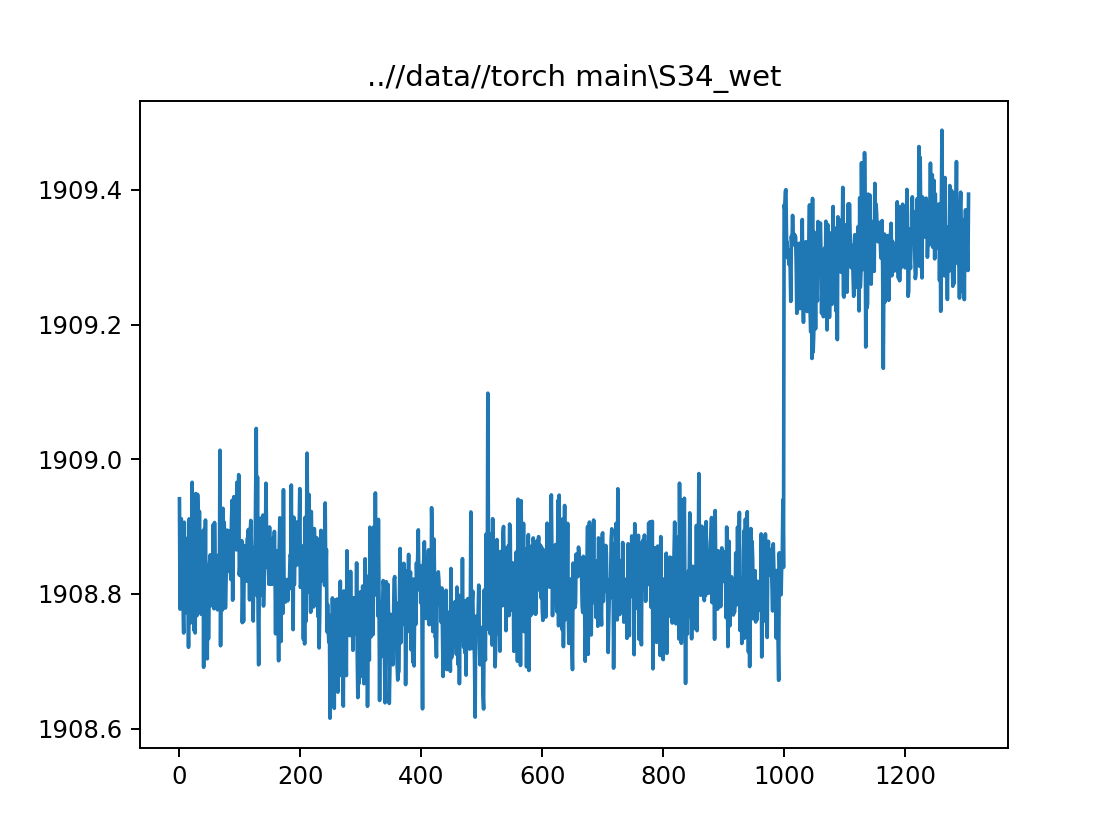

Data shape:  torch.Size([1306, 1, 35000])


<IPython.core.display.Javascript object>


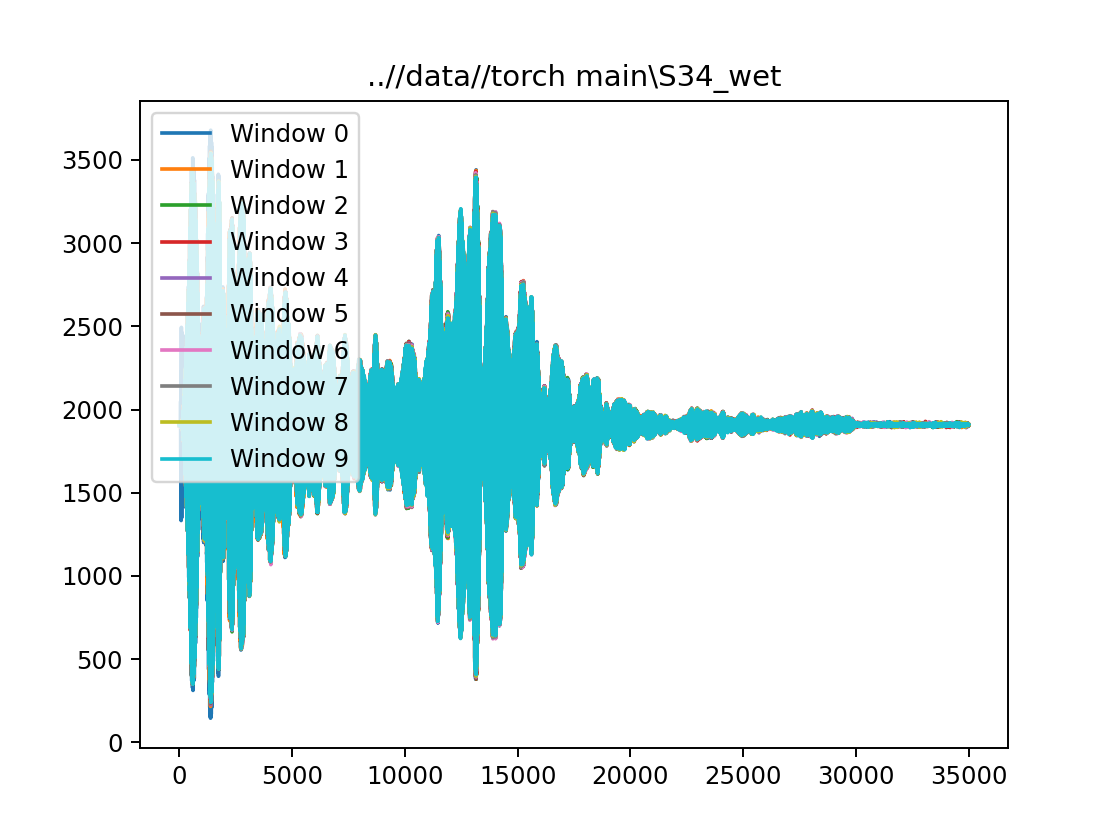

Data shape:  torch.Size([220, 1, 35000])


<IPython.core.display.Javascript object>


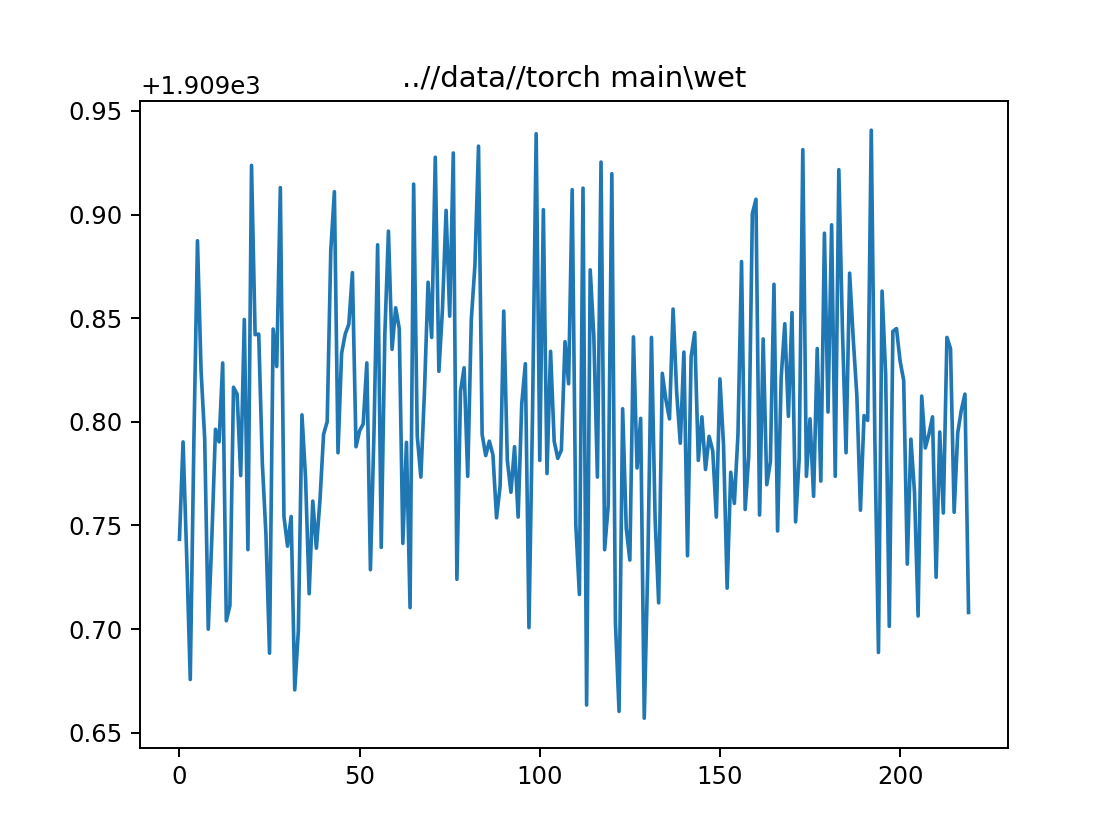

Data shape:  torch.Size([220, 1, 35000])


<IPython.core.display.Javascript object>


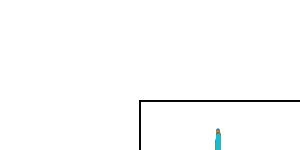

In [12]:
for file in allFiles:
    plot_mean(file)
    plot_windows(file, index=0)